# Machine Learning-Based Classification of Structural Protein Sequences for Drug Discovery

<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>1. Introduction</strong>
</div>

### 1.1. Background

Proteins are fundamental biomolecules that carry out essential functions within living organisms. Understanding the structure of a protein is critical for drug discovery, as the structural conformation often determines the protein’s function, interaction with other molecules, and its role in disease mechanisms. Traditional experimental methods to determine protein structure, such as X-ray crystallography and NMR spectroscopy, are time-consuming and expensive.

Advances in computational biology and machine learning offer an efficient alternative. By leveraging sequence-based features, deep learning models such as Long Short-Term Memory (LSTM) networks and transformer-based large language models (LLMs) can predict protein structural classes directly from amino acid sequences. These approaches accelerate the identification of potential drug targets and facilitate the design of novel therapeutics.

### 1.2. Purpose

---

**Classify protein function category based solely on amino acid sequence using supervised machine learning.**

---

The purpose of this project is to develop a machine learning pipeline for classifying structural protein sequences into their respective structural classes, using sequence data alone. Specifically, this project aims to:

1. Preprocess protein sequences and convert them into machine-readable formats suitable for deep learning models.

2. Apply Natural Language Processing (NLP) techniques, including embeddings and sequence modeling, to capture meaningful patterns in protein sequences.

3. Compare the performance of different models using NLP, LSTM networks, and LLM, in structural protein classification.

4. Provide insights into how computational sequence analysis can accelerate drug discovery and facilitate the identification of novel therapeutic targets.

### 1.3. Dataset

The protein sequence data used is publicly available at [Kaggle](https://www.kaggle.com/code/davidhjek/protein-sequence-classification). It was retrieved from Research Collaboratory for Structural Bioinformatics (RCSB) Protein Data Bank (PDB).

- `pdb_data_no_dups.csv` contains protein metadata which includes details on protein classification, extraction methods, etc.

| Column                     | Description                                                                                 |
| -------------------------- | ------------------------------------------------------------------------------------------- |
| `structureId`              | Unique identifier for each protein structure in the PDB (Protein Data Bank).                |
| `classification`           | Structural class or category of the protein (e.g., enzyme, transporter).                    |
| `experimentalTechnique`    | Method used to determine the protein structure (e.g., X-ray crystallography, NMR, cryo-EM). |
| `macromoleculeType`        | Type of macromolecule (e.g., protein, DNA, RNA).                                            |
| `residueCount`             | Number of amino acid residues in the protein chain.                                         |
| `resolution`               | Resolution of the protein structure (Ångströms), relevant for X-ray crystallography.        |
| `structureMolecularWeight` | Molecular weight of the protein structure (Daltons).                                        |
| `crystallizationMethod`    | Method used for crystallizing the protein (if applicable).                                  |
| `crystallizationTemp`      | Temperature used for protein crystallization (Kelvin or Celsius).                           |
| `densityMatthews`          | Matthews coefficient, a measure of crystal packing density.                                 |
| `densityPercentSol`        | Estimated solvent content (%) in the crystal.                                               |
| `pdbxDetails`              | Additional details about the structure (text description).                                  |
| `phValue`                  | pH at which the protein structure was determined.                                           |
| `publicationYear`          | Year the protein structure was published in the PDB.                                        |

    
- `pdb_data_seq.csv` contains >400,000 protein structure sequences.

| Column              | Description                                                                   |
| ------------------- | ----------------------------------------------------------------------------- |
| `structureId`       | Unique identifier for the protein structure (matches `pdb_data_no_dups.csv`). |
| `chainId`           | Identifier for the protein chain within the structure (A, B, C, etc.).        |
| `sequence`          | Amino acid sequence of the chain (one-letter codes).                          |
| `residueCount`      | Number of residues in this chain.                                             |
| `macromoleculeType` | Type of macromolecule (e.g., protein, DNA, RNA).                              |

### 1.3. Amino Acid Code

Protein sequences are expressed as a series of one letter abbreviations for each amino acid, given below:

#### 1.3.1. Alphabetical

| One-Letter Code | Amino Acid    |
| :---------------: | ------------- |
| A               | Alanine       |
| R               | Arginine      |
| N               | Asparagine    |
| D               | Aspartic Acid |
| C               | Cysteine      |
| E               | Glutamic Acid |
| Q               | Glutamine     |
| G               | Glycine       |
| H               | Histidine     |
| I               | Isoleucine    |
| L               | Leucine       |
| K               | Lysine        |
| M               | Methionine    |
| F               | Phenylalanine |
| P               | Proline       |
| S               | Serine        |
| T               | Threonine     |
| W               | Tryptophan    |
| Y               | Tyrosine      |
| V               | Valine        |

#### 1.3.2. By Properties

##### Nonpolar, Aliphatic
| One-letter Code| Amino Acid       | Notes                        |
|:------------:|-----------------|-------------------------------|
| A          | Alanine          | Small, hydrophobic            |
| G          | Glycine          | Smallest residue, flexible    |
| I          | Isoleucine       | Hydrophobic, aliphatic        |
| L          | Leucine          | Hydrophobic, aliphatic        |
| M          | Methionine       | Contains sulfur               |
| P          | Proline          | Cyclic, rigid structure       |
| V          | Valine           | Hydrophobic, aliphatic        |

##### Aromatic
| One-letter Code| Amino Acid       | Notes                        |
|:------------:|-----------------|-------------------------------|
| F          | Phenylalanine    | Nonpolar, aromatic            |
| W          | Tryptophan       | Aromatic, slightly polar      |
| Y          | Tyrosine         | Polar, aromatic               |

##### Polar, Uncharged
| One-letter Code| Amino Acid       | Notes                        |
|:------------:|-----------------|-------------------------------|
| C          | Cysteine         | Can form disulfide bonds      |
| N          | Asparagine       | Polar, uncharged              |
| Q          | Glutamine        | Polar, uncharged              |
| S          | Serine           | Polar, uncharged              |
| T          | Threonine        | Polar, uncharged              |

##### Acidic (Negative)
| One-letter Code| Amino Acid       | Notes                        |
|:------------:|-----------------|-------------------------------|
| D          | Aspartic Acid    | Acidic, negatively charged    |
| E          | Glutamic Acid    | Acidic, negatively charged    |

##### Basic (Positive)
| One-letter Code| Amino Acid       | Notes                        |
|:------------:|-----------------|-------------------------------|
| K          | Lysine           | Basic, positively charged     |
| R          | Arginine         | Basic, positively charged     |
| H          | Histidine        | Basic, partially charged at physiological pH |

##### Ambiguous / Wildcards
| One-letter Code| Amino Acid / Meaning              | Notes                        |
|:------------:|---------------------------------|-------------------------------|
| B          | Aspartic Acid (D) / Asparagine (N) | Ambiguous                     |
| Z          | Glutamic Acid (E) / Glutamine (Q)  | Ambiguous                     |
| X          | Unknown amino acid                 | Wildcard                       |
| J          | Leucine (L) / Isoleucine (I)      | Ambiguous                     |
| U          | Selenocysteine                     | Rare non-standard amino acid  |
| O          | Pyrrolysine                        | Rare non-standard amino acid  |


<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>2. Import Libraries and Data</strong>
</div>

### 2.1. Import Libraries

In [37]:
# Core
import os
import platform
import numpy as np
import pandas as pd
import pickle

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import seaborn as sns
import logomaker
from wordcloud import WordCloud

# Data preprocessing
from fuzzywuzzy import process
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from lazypredict.Supervised import LazyClassifier

# Modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD, PCA

# Tuning
import optuna
from tqdm import tqdm

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# NLP / Deep Learning (LSTM, embeddings)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # Show all TF logs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, Conv1D, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization, Concatenate, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import tensorflow_hub as hub
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# LLM / Transformers (protein language models)
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import sentencepiece
import esm
import torch
import h5py

# Bioinformatics
from Bio import SeqIO
from Bio.PDB import PDBParser, DSSP

# Notebook Utilities
from tqdm.notebook import tqdm
import ipywidgets as widgets

In [2]:
print("=== GENERAL ===")
print("TensorFlow version:", tf.__version__)
print("Physical GPUs:", tf.config.list_physical_devices('GPU'))

print("\n=== SYSTEM INFO ===")
print("Python:", platform.python_version(), platform.architecture())
print("OS:", platform.system(), platform.release())
print("TensorFlow version:", tf.__version__)

print("\n=== PHYSICAL DEVICES ===")
devices = tf.config.list_physical_devices()
print(devices)

print("\n=== CUDA PATH CHECK ===")
cuda_bin = r"C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.2\bin"
dlls = os.listdir(cuda_bin) if os.path.exists(cuda_bin) else []
print("cudart64 present:", any("cudart64" in f for f in dlls))
print("cudnn present:", any("cudnn" in f for f in dlls))
print("All DLLs found:", "Yes" if any("cudart64" in f for f in dlls) and any("cudnn" in f for f in dlls) else "No")

print("\n=== ENVIRONMENT VARIABLES ===")
print("CUDA_PATH:", os.environ.get("CUDA_PATH"))
print("PATH includes CUDA bin:", any(cuda_bin.lower() in p.lower() for p in os.environ.get("PATH", "").split(";")))


=== GENERAL ===
TensorFlow version: 2.21.0-dev20251107
Physical GPUs: []

=== SYSTEM INFO ===
Python: 3.11.0 ('64bit', 'WindowsPE')
OS: Windows 10
TensorFlow version: 2.21.0-dev20251107

=== PHYSICAL DEVICES ===
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

=== CUDA PATH CHECK ===
cudart64 present: True
cudnn present: True
All DLLs found: Yes

=== ENVIRONMENT VARIABLES ===
CUDA_PATH: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.2
PATH includes CUDA bin: True


### 2.2. Import Datasets

In [3]:
# Metadata
metadata = pd.read_csv("pdb_data_no_dups.csv")

# Sequences
sequences = pd.read_csv("pdb_data_seq.csv")

print("Metadata:")
display(metadata.head())
display(metadata.info())
display(metadata.shape)
print()
print("Sequences:")
display(sequences.head())
display(sequences.info())
display(sequences.shape)

Metadata:


,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.00,1994.00
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.00
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.00,1999.00
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.00,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.00,1995.00
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

None

(141401, 14)


Sequences:


,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB


None

(467304, 5)

### 2.3. Analysis of Features

#### 2.3.1. Metadata

| Column                     | Use for modeling? | Notes                                                         |
| -------------------------- | ----------------- | ------------------------------------------------------------- |
| `structureId`              | ✅ Yes             | Key for merging sequences with labels                         |
| `classification`           | ✅ Yes             | **Target variable** (structural class)                            |
| `experimentalTechnique`    | ❌ No              | Optional metadata, not used for sequence-based ML             |
| `macromoleculeType`        | ❌ No              | Could filter out non-proteins, but not a feature for LSTM/LLM |
| `residueCount`             | ❌ No              | Sequence length is captured from sequences themselves         |
| `resolution`               | ❌ No              | Metadata, not used in current model                           |
| `structureMolecularWeight` | ❌ No              | Metadata                                                      |
| `crystallizationMethod`    | ❌ No              | Metadata                                                      |
| `crystallizationTempK`     | ❌ No              | Metadata                                                      |
| `densityMatthews`          | ❌ No              | Metadata                                                      |
| `densityPercentSol`        | ❌ No              | Metadata                                                      |
| `pdbxDetails`              | ❌ No              | Metadata                                                      |
| `phValue`                  | ❌ No              | Metadata                                                      |
| `publicationYear`          | ❌ No              | Metadata                                                      |

#### 2.3.2. Sequences

| Column              | Use for modeling? | Notes                                                                   |
| ------------------- | ----------------- | ----------------------------------------------------------------------- |
| `structureId`       | ✅ Yes             | Merge key                                                               |
| `chainId`           | ❌ Optional        | Could treat different chains separately; usually just keeps unique rows |
| `sequence`          | ✅ Yes             | **Main feature** for NLP/LLM/LSTM                                       |
| `residueCount`      | ❌ Optional        | Length can be derived from `sequence`                                   |
| `macromoleculeType` | ❌ Optional        | Could filter out non-proteins, usually redundant                        |


### 2.4. Merge, Filter, and Clean Up Datasets

#### 2.4.1. Merge and Filter

In [4]:
# Merge sequences with metadata for complete dataset
data_all = pd.merge(sequences[['chainId', 'sequence', 'structureId']], metadata, on='structureId', how='inner', suffixes=('', '')) # Avoids redundant columns duplicating

# Keep only protein data as a new df
data = data_all[data_all['macromoleculeType'] == 'Protein']

# Drop missing label and sequences since these will be the feature (X) and target (y) of models later
data = data[data['classification'].notnull()]
data = data[data['sequence'].notnull()]

# Reset index
data.reset_index()

# Check
print(data.shape)
data.head()

# Save CSV at this step
data.to_csv("data.csv", index=False)

(346321, 16)


#### 2.4.2. Clean Up

##### 2.4.2.1. Rename Columns

In [5]:
# Rename columns for readability and consistency
# All lowercase and separate words with underscores
data = data.rename(columns={
    'structureId': 'structure_id',
    'chainId': 'chain_id',
    'sequence': 'sequence',
    'residueCount': 'residue_count',
    'macromoleculeType': 'macromolecule_type',
    'classification': 'classification'
})

# Change all classifications to lowercase (target variable)
#data['classification'] = data['classification'].lower()

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 346321 entries, 4 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   chain_id                  346319 non-null  object 
 1   sequence                  346321 non-null  object 
 2   structure_id              346321 non-null  object 
 3   classification            346321 non-null  object 
 4   experimentalTechnique     346321 non-null  object 
 5   macromolecule_type        346321 non-null  object 
 6   residue_count             346321 non-null  int64  
 7   resolution                330228 non-null  float64
 8   structureMolecularWeight  346321 non-null  float64
 9   crystallizationMethod     240593 non-null  object 
 10  crystallizationTempK      243930 non-null  float64
 11  densityMatthews           307477 non-null  float64
 12  densityPercentSol         307611 non-null  float64
 13  pdbxDetails               294693 non-null  object

,chain_id,sequence,structure_id,classification,experimentalTechnique,macromolecule_type,residue_count,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
4,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.00,1999.00
7,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.00
8,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.00,1999.00
11,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.00
12,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.00,1999.00


##### 2.4.2.2. Check for Missing Values

We have already accounted for missing `sequence` (`X`) and `classification` (`y`) but we will explore others.

In [6]:
"""
# Heatmap of missing values
plt.figure(figsize=(12, len(data)/10))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", linewidths=0)  # True = missing, False = not missing
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()
"""

'\n# Heatmap of missing values\nplt.figure(figsize=(12, len(data)/10))\nsns.heatmap(data.isnull(), cbar=False, cmap="viridis", linewidths=0)  # True = missing, False = not missing\nplt.title("Heatmap of Missing Values")\nplt.xlabel("Columns")\nplt.ylabel("Rows")\nplt.show()\n'

<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>3. Exploratory Data Analysis - General</strong>
</div>

In this section, we will explore the feature (`sequence`) and target (`classification`) variables in the raw data.

### 3.1. Sequence

#### 3.1.1. Length

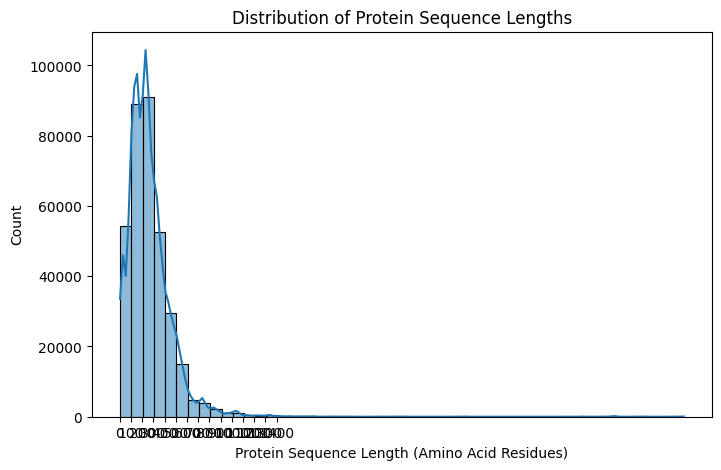

In [7]:
# Add new column
data['sequence_length'] = data['sequence'].str.len()

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data['sequence_length'], bins=50, kde=True)
plt.title('Distribution of Protein Sequence Lengths')
plt.xlabel('Protein Sequence Length (Amino Acid Residues)')
plt.xticks(ticks=range(0, 1500, 100))
plt.ylabel('Count')
plt.show()

# Describe distribution
data['sequence_length'].describe()

# Create function
def sequence_lengths(df):
    df['sequence_length'] = df['sequence'].apply(len)
    df['sequence_length'].hist(bins=50)
    plt.xlabel('Sequence Length')
    plt.ylabel('Number of Sequences')
    plt.show()
    return

#### 3.1.2. Properties

##### 3.1.2.1. Amino Acid Composition

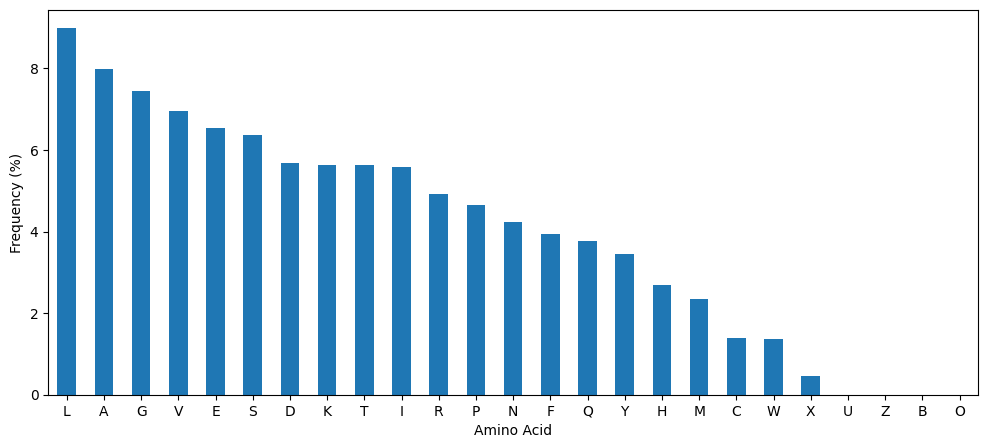

In [8]:
aa_counts = Counter("".join(data['sequence']))
aa_freq_pct = {aa: (count / sum(aa_counts.values())) * 100 for aa, count in aa_counts.items()}

# Convert to DataFrame for plotting
aa_df = pd.DataFrame(list(aa_freq_pct.items()), columns=['Amino Acid', 'Frequency']).sort_values('Frequency', ascending=False)

aa_df.plot(kind='bar', x='Amino Acid', y='Frequency', figsize=(12,5))
plt.xticks(rotation=0)
plt.ylabel('Frequency (%)')
plt.legend().set_visible(False)
plt.show()

# Create function
def aa_composition(df):
    aa_counts = Counter("".join(df['sequence']))
    aa_freq = {aa: count / sum(aa_counts.values()) * 100 for aa, count in aa_counts.items()}
    aa_df = pd.DataFrame(list(aa_freq.items()), columns=['Amino Acid', 'Frequency']).sort_values('Frequency', ascending=False)
    aa_df.plot(kind='bar', x='AminoAcid', y='Frequency', legend=False)
    plt.ylabel('Frequency (%)')
    plt.xticks(rotation=45)
    plt.show()

##### 3.1.2.2. Biochemical Properties

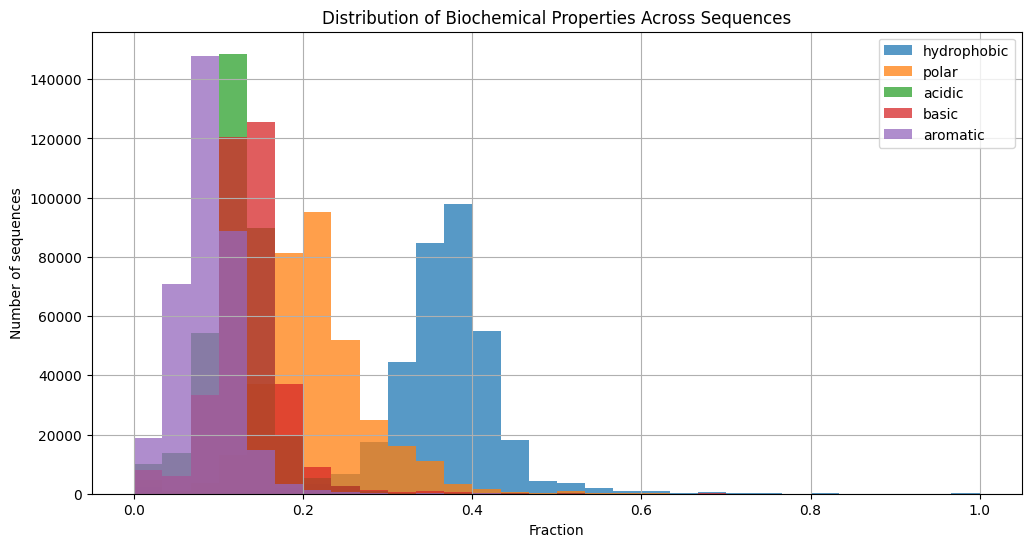

In [9]:
# Hydrophobic (nonpolar) residues
hydrophobic = set('AILMFWV')

# Polar uncharged residues
polar_uncharged = set('CSTNQ')

# Acidic (negatively charged)
acidic = set('DE')

# Basic (positively charged)
basic = set('KRH')

# Aromatic residues
aromatic = set('FYW')

# Compute fraction for each property
def aa(seq, aa_set):
    return sum(aa in aa_set for aa in seq) / len(seq)

# Apply to data
data['hydrophobic'] = data['sequence'].apply(lambda s: aa(s, hydrophobic))
data['polar'] = data['sequence'].apply(lambda s: aa(s, polar_uncharged))
data['acidic'] = data['sequence'].apply(lambda s: aa(s, acidic))
data['basic'] = data['sequence'].apply(lambda s: aa(s, basic))
data['aromatic'] = data['sequence'].apply(lambda s: aa(s, aromatic))

# Plot
properties = ['hydrophobic', 'polar', 'acidic', 'basic', 'aromatic']

plt.figure(figsize=(12,6))
for prop in properties:
    data[prop].hist(alpha=0.75, bins=30, label=prop)

plt.xlabel('Fraction')
plt.ylabel('Number of sequences')
plt.title('Distribution of Biochemical Properties Across Sequences')
plt.legend()
plt.show()

# Average property fraction per class
class_props = data.groupby('classification')[properties].mean()
class_props

# Create function
def biochemical_properties(df):
    hydrophobic = set('AILMFWV')
    polar_uncharged = set('CSTNQ')
    acidic = set('DE')
    basic = set('KRH')
    aromatic = set('FYW')

    df['hydrophobic'] = df['sequence'].apply(lambda s: sum(aa in hydrophobic for aa in s)/len(s))
    df['polar'] = df['sequence'].apply(lambda s: sum(aa in polar_uncharged for aa in s)/len(s))
    df['acidic'] = df['sequence'].apply(lambda s: sum(aa in acidic for aa in s)/len(s))
    df['basic'] = df['sequence'].apply(lambda s: sum(aa in basic for aa in s)/len(s))
    df['aromatic'] = df['sequence'].apply(lambda s: sum(aa in aromatic for aa in s)/len(s))
    
    properties = ['hydrophobic', 'polar', 'acidic', 'basic', 'aromatic']

    plt.figure(figsize=(12,6))
    for prop in properties:
        data[prop].hist(alpha=0.75, bins=30, label=prop)

    plt.xlabel('Fraction')
    plt.ylabel('Number of sequences')
    plt.title('Distribution of Biochemical Properties Across Sequences')
    plt.legend()
    plt.show()

    return df

##### 3.1.2.3. K-mer Counts

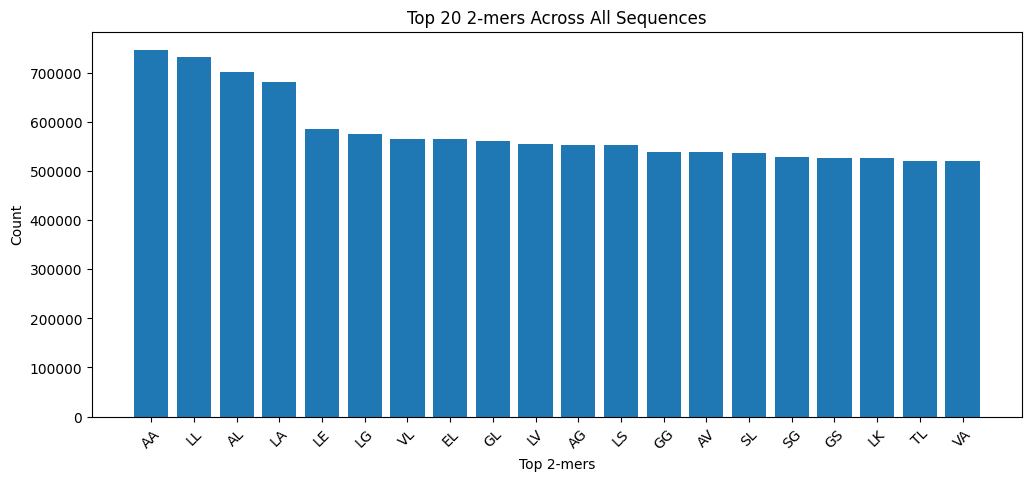

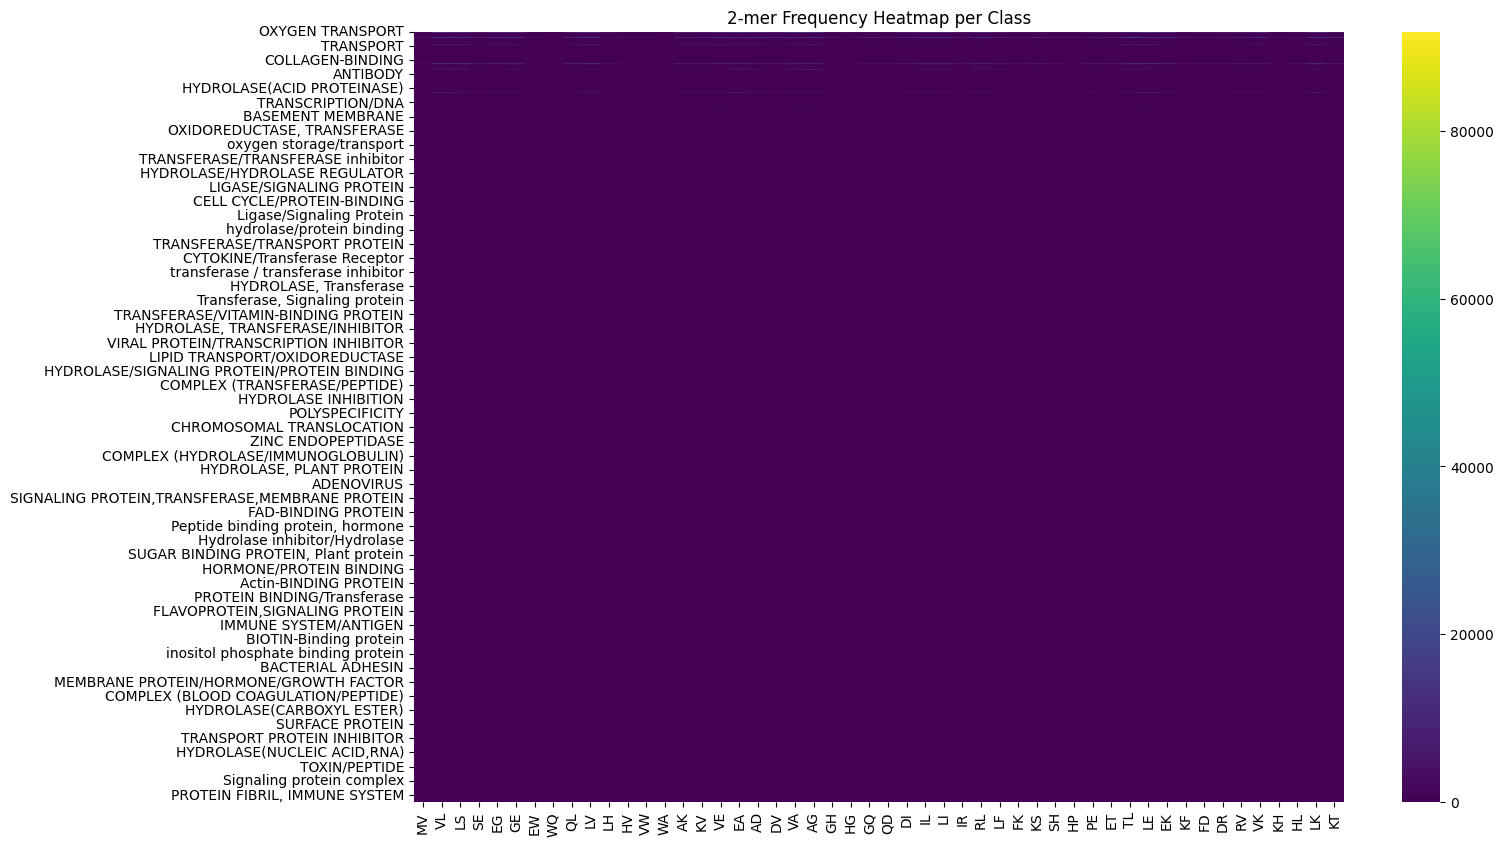

In [10]:
def get_kmers(seq, k=2):
    """Return list of all k-mers in a sequence."""
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

# Example: count dipeptides (k=2) across all sequences
k = 2
all_kmers = Counter()

for seq in data['sequence']:
    all_kmers.update(get_kmers(seq, k=k))

# Convert to DataFrame for easy plotting
kmer_df = pd.DataFrame(all_kmers.items(), columns=['k-mer', 'Count']).sort_values('Count', ascending=False)

# Plot
top_n = 20
plt.figure(figsize=(12,5))
plt.bar(kmer_df['k-mer'].head(top_n), kmer_df['Count'].head(top_n))
plt.xticks(rotation=45)
plt.xlabel(f'Top {k}-mers')
plt.ylabel('Count')
plt.title(f'Top {top_n} {k}-mers Across All Sequences')
plt.show()

# Frequency
# Create a dictionary of Counter objects per class
class_kmers = {cls: Counter() for cls in data['classification'].unique()}

for cls, group in data.groupby('classification'):
    for seq in group['sequence']:
        class_kmers[cls].update(get_kmers(seq, k=k))

# Convert to DataFrame (classes x k-mers)
class_kmer_df = pd.DataFrame.from_dict(class_kmers, orient='index').fillna(0)

# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(class_kmer_df.iloc[:, :50], cmap='viridis')  # first 50 k-mers for readability
plt.title(f'{k}-mer Frequency Heatmap per Class')
plt.show()


### 3.2. Classification

#### 3.2.1. Values

In [11]:
print(Counter(data['classification']))
print(len(Counter(data['classification'])))

Counter({'HYDROLASE': 46336, 'TRANSFERASE': 36424, 'OXIDOREDUCTASE': 34321, 'IMMUNE SYSTEM': 15615, 'LYASE': 11682, 'HYDROLASE/HYDROLASE INHIBITOR': 11218, 'TRANSCRIPTION': 8919, 'VIRAL PROTEIN': 8495, 'TRANSPORT PROTEIN': 8371, 'VIRUS': 6972, 'SIGNALING PROTEIN': 6469, 'ISOMERASE': 6356, 'LIGASE': 4964, 'MEMBRANE PROTEIN': 4891, 'PROTEIN BINDING': 4884, 'STRUCTURAL PROTEIN': 4335, 'CHAPERONE': 4156, 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION': 3548, 'SUGAR BINDING PROTEIN': 3474, 'DNA BINDING PROTEIN': 3199, 'PHOTOSYNTHESIS': 3139, 'ELECTRON TRANSPORT': 3047, 'TRANSFERASE/TRANSFERASE INHIBITOR': 3032, 'METAL BINDING PROTEIN': 3023, 'CELL ADHESION': 2999, 'UNKNOWN FUNCTION': 2842, 'PROTEIN TRANSPORT': 2674, 'TOXIN': 2626, 'CELL CYCLE': 2496, 'RNA BINDING PROTEIN': 1969, 'DE NOVO PROTEIN': 1635, 'HORMONE': 1523, 'GENE REGULATION': 1501, 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR': 1474, 'APOPTOSIS': 1382, 'MOTOR PROTEIN': 1238, 'PROTEIN FIBRIL': 1205, 'METAL TRANSPORT': 1166, 'VIRAL PROTEIN/I

There are too many classes here to reliably model (4468). I will:
1. Check for redundancy and combine equivalent classes, and
2. Group rare classes into an "Other" category.

In [12]:
# Normalize classification text by making all uppercase and stripping whitespace and punctuation
data['classification'] = (
    data['classification']
    .str.upper()
    .str.strip()
    .str.replace(r'[^A-Z0-9 /]', '', regex=True)
)

# Extract top 20 classes
#top_20_classes = data['classification'].value_counts().head(20).index.tolist()
top_50_classes = data['classification'].value_counts().head(50).index.tolist()

# Check classes 21-30 for safety
#classes_21_30 = data['classification'][20:30]
#print(f"21st - 30th classes: {classes_21_30}")

# Check classes 31-50 for safety
#classes_31_50 = data['classification'][30:50]
#print(f"31st - 50th classes: {classes_31_50}")

# Use Fuzzywuzzy to check for synonyms
synonyms = {}

for c in top_50_classes:
    matches = process.extract(c, top_50_classes, limit=10)
    # Keep matches with similarity >= 90 (adjust threshold if needed)
    synonyms[c] = [m[0] for m in matches if m[1] >= 90 and m[0] != c]

synonyms

{'HYDROLASE': ['HYDROLASE/HYDROLASE INHIBITOR'],
 'TRANSFERASE': ['TRANSFERASE/TRANSFERASE INHIBITOR'],
 'OXIDOREDUCTASE': ['OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR'],
 'IMMUNE SYSTEM': ['VIRAL PROTEIN/IMMUNE SYSTEM'],
 'HYDROLASE/HYDROLASE INHIBITOR': ['HYDROLASE'],
 'LYASE': ['LYASE/LYASE INHIBITOR'],
 'TRANSCRIPTION': ['TRANSCRIPTION REGULATOR'],
 'VIRAL PROTEIN': ['VIRAL PROTEIN/IMMUNE SYSTEM'],
 'TRANSPORT PROTEIN': ['PROTEIN TRANSPORT'],
 'VIRUS': ['VIRUS LIKE PARTICLE'],
 'SIGNALING PROTEIN': [],
 'ISOMERASE': [],
 'STRUCTURAL GENOMICS UNKNOWN FUNCTION': ['UNKNOWN FUNCTION'],
 'LIGASE': [],
 'MEMBRANE PROTEIN': [],
 'PROTEIN BINDING': ['SUGAR BINDING PROTEIN',
  'DNA BINDING PROTEIN',
  'METAL BINDING PROTEIN',
  'RNA BINDING PROTEIN',
  'LIPID BINDING PROTEIN'],
 'TRANSFERASE/TRANSFERASE INHIBITOR': ['TRANSFERASE'],
 'STRUCTURAL PROTEIN': [],
 'CHAPERONE': [],
 'SUGAR BINDING PROTEIN': ['PROTEIN BINDING'],
 'DNA BINDING PROTEIN': ['PROTEIN BINDING', 'RNA BINDING PROTEIN'],
 'PH

Based on the top 50 classes, I will make a final set of no more than 50 (best for language learning models):
1. The top 50 classes, with any synonyms included.
3. An "OTHER" class to capture the remainder of any biologically relevant classes.
4. Classes must be represented by at least 200 sequences.

#### 3.2.2. Frequency

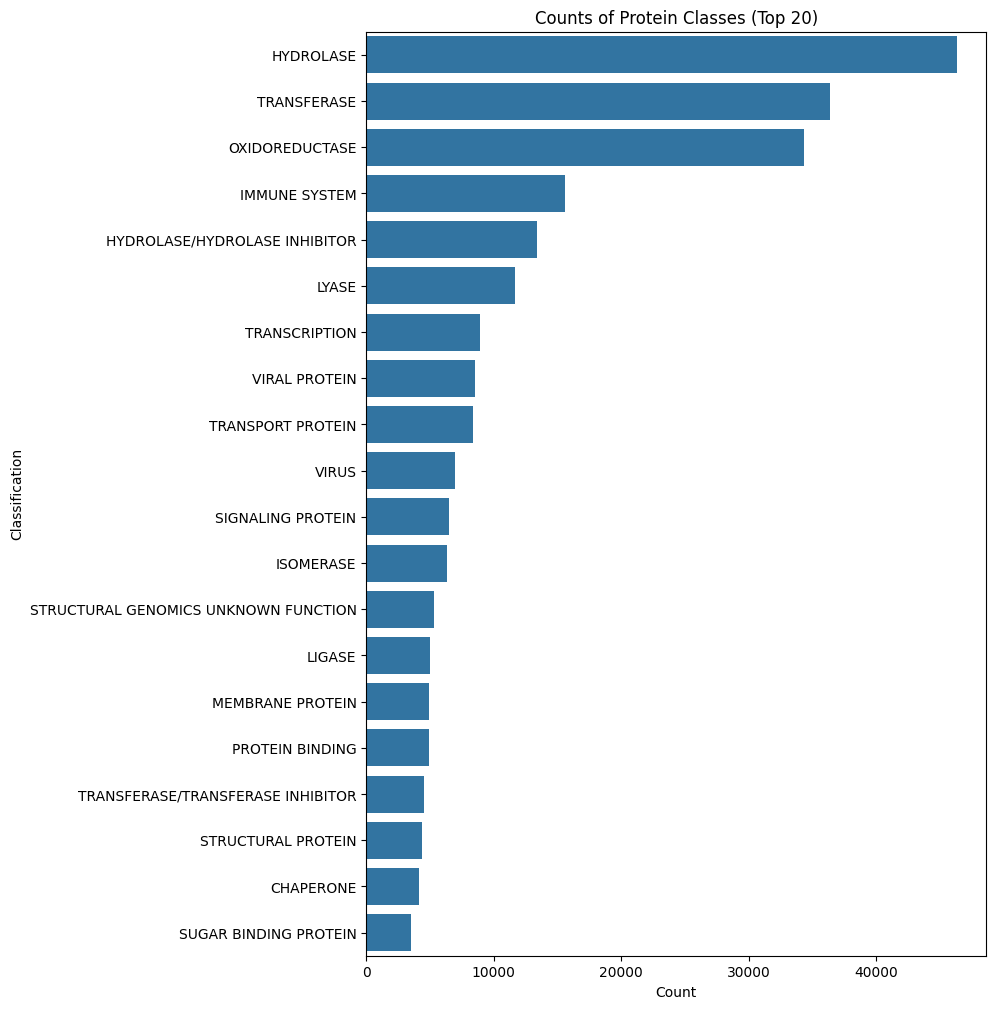

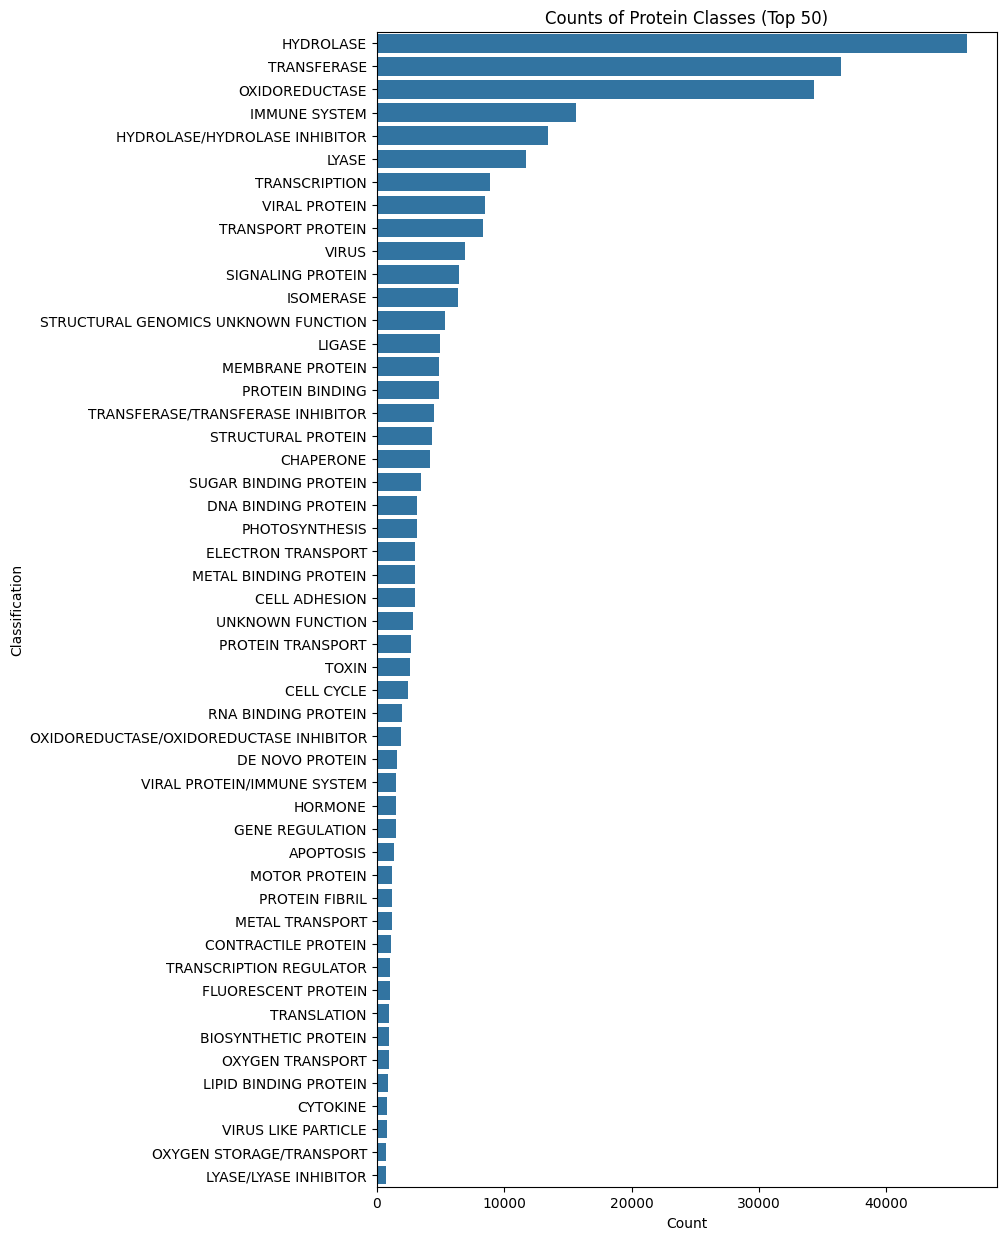

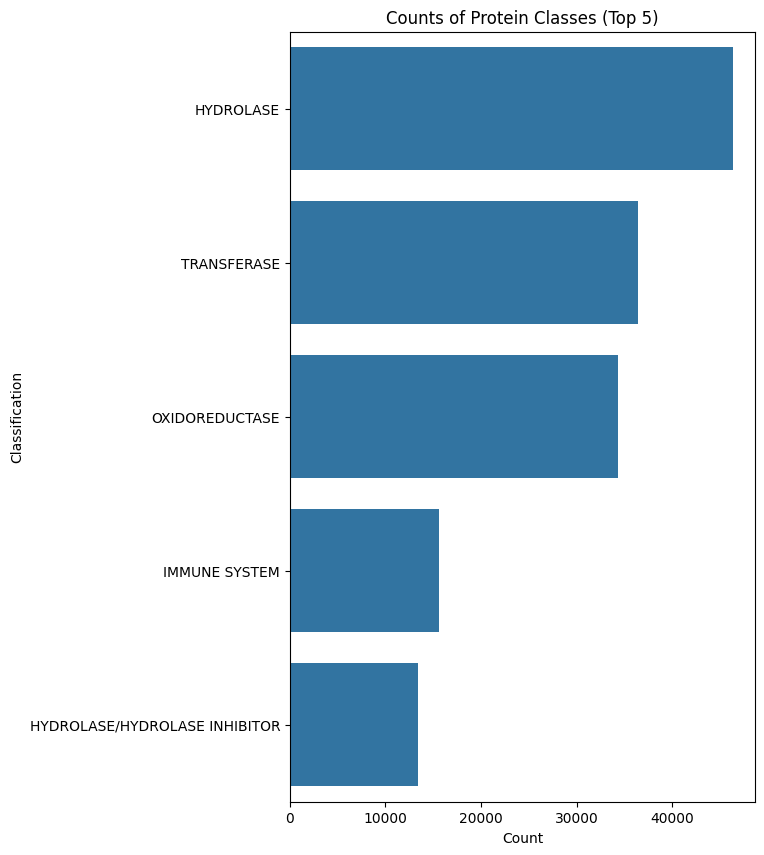

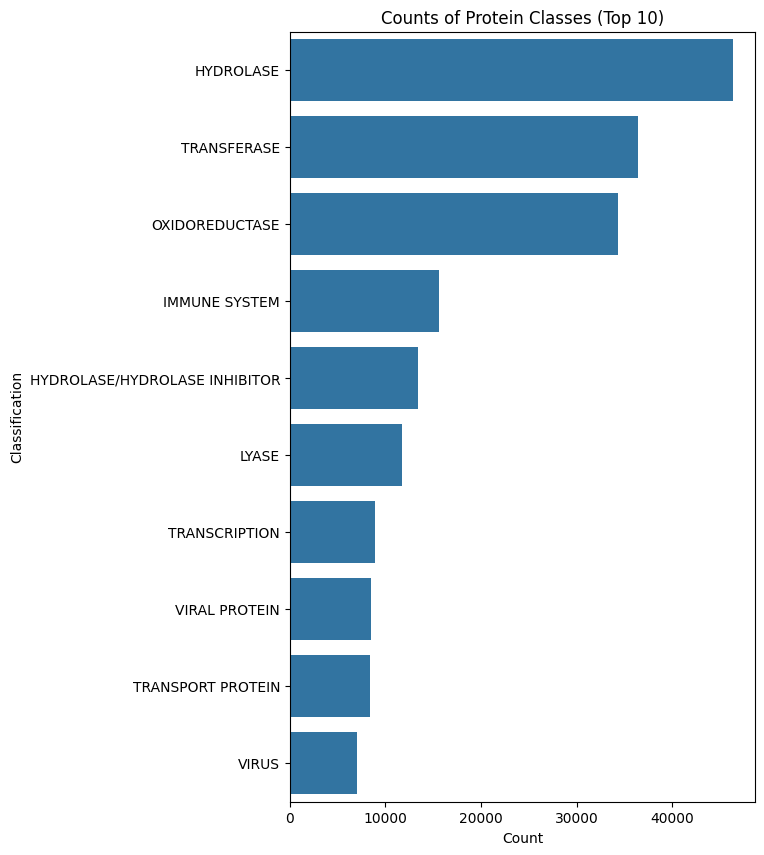

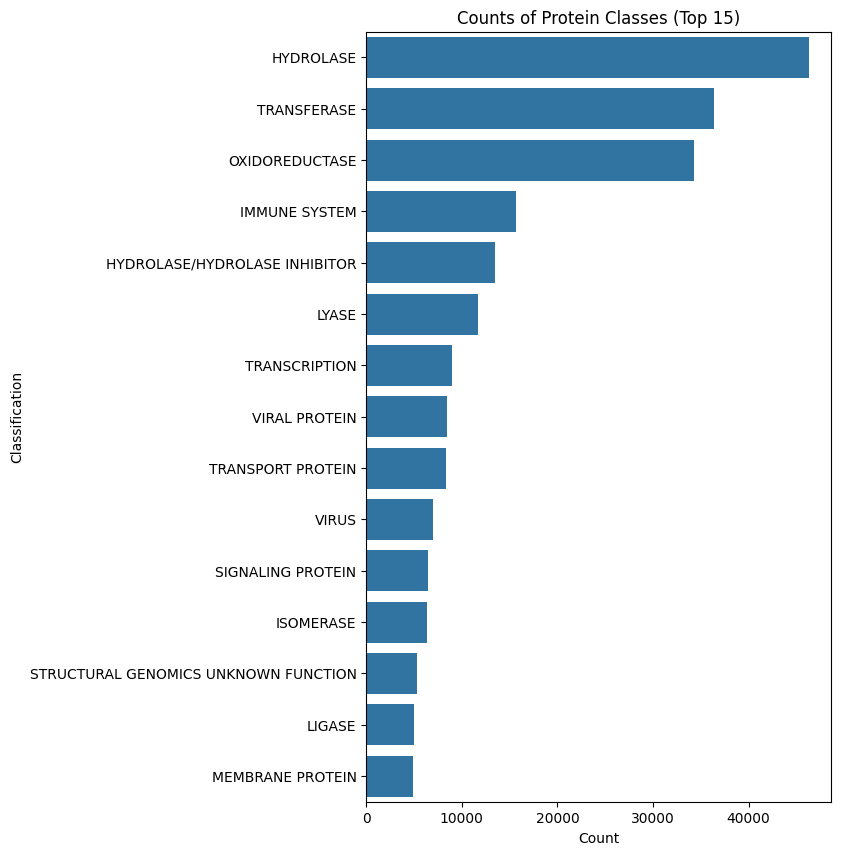

In [13]:
# Compute counts for top 20
counts = data['classification'].value_counts().sort_values(ascending=False).head(20)

# Plot descending barplot
plt.figure(figsize=(8, 12))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel("Count")
plt.ylabel("Classification")
plt.title("Counts of Protein Classes (Top 20)")
plt.show()

# Compute counts for top 50
counts = data['classification'].value_counts().sort_values(ascending=False).head(50)

# Plot descending barplot
plt.figure(figsize=(8, 15))
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel("Count")
plt.ylabel("Classification")
plt.title("Counts of Protein Classes (Top 50)")
plt.yticks(fontsize=10)
plt.show()

# Function
def classification_plot(n):
    counts = data['classification'].value_counts().sort_values(ascending=False).head(n)

    plt.figure(figsize=(6, 10))
    sns.barplot(x=counts.values, y=counts.index)
    plt.xlabel("Count")
    plt.ylabel("Classification")
    plt.title(f"Counts of Protein Classes (Top {n})")
    plt.yticks(fontsize=10)
    plt.show()
    return

# Add 5, 10, and 15
classification_plot(5)
classification_plot(10)
classification_plot(15)

We can see a large imbalance in the top 50 classes, which will need to be accounted for later.

#### 3.2.3. Sequences vs. Classification

The types of models being explored here do best with fewer than 50 classes and/or more than 200 sets of data (sequences in this case). Below, we can rank the classes by their nmber of representative sequences and decide on breakpoints.

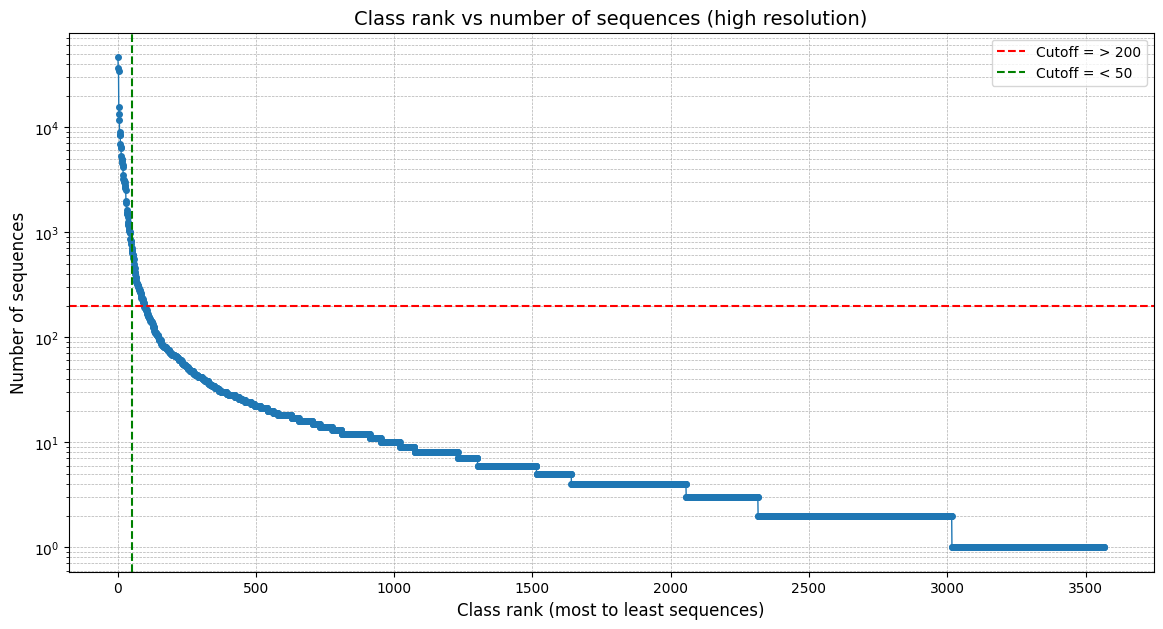

In [14]:
# Count sequences per class
class_counts = data['classification'].value_counts().sort_values(ascending=False)

# Create rank index
ranks = range(1, len(class_counts)+1)

# Plot
plt.figure(figsize=(14,7))
plt.plot(ranks, class_counts.values, marker='o', markersize=4, linewidth=1)
plt.xlabel('Class rank (most to least sequences)', fontsize=12)
plt.ylabel('Number of sequences', fontsize=12)
plt.title('Class rank vs number of sequences (high resolution)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Cutoff lines
# Sequences (> 200)
y_cutoff = 200
plt.axhline(y=y_cutoff, color='red', linestyle='--', label=f'Cutoff = > {y_cutoff}')
# Number of classes (< 50)
x_cutoff = 50
plt.axvline(x=x_cutoff, color='green', linestyle='--', label=f'Cutoff = < {x_cutoff}')
plt.legend()

# Optional: log scale to emphasize lower counts
plt.yscale('log')
plt.show()

In [15]:
# Filter classes (start with top 20)
#top_classes = class_counts.head(50).index.tolist()
top_classes = class_counts.head(20).index.tolist()
top_classes

['HYDROLASE',
 'TRANSFERASE',
 'OXIDOREDUCTASE',
 'IMMUNE SYSTEM',
 'HYDROLASE/HYDROLASE INHIBITOR',
 'LYASE',
 'TRANSCRIPTION',
 'VIRAL PROTEIN',
 'TRANSPORT PROTEIN',
 'VIRUS',
 'SIGNALING PROTEIN',
 'ISOMERASE',
 'STRUCTURAL GENOMICS UNKNOWN FUNCTION',
 'LIGASE',
 'MEMBRANE PROTEIN',
 'PROTEIN BINDING',
 'TRANSFERASE/TRANSFERASE INHIBITOR',
 'STRUCTURAL PROTEIN',
 'CHAPERONE',
 'SUGAR BINDING PROTEIN']

In [16]:
# When finished with final classes
# top_classes = [...]  # list of your 50 chosen classes
data_filtered = data[data['classification'].isin(top_classes)].reset_index(drop=True) # Do EDA on these (move above sequences section)

# Save filtered csv
data_filtered.to_csv("data_filtered.csv")

# Check
print(data_filtered.shape)
data_filtered.head(10)

(239956, 22)


,chain_id,sequence,structure_id,classification,experimentalTechnique,macromolecule_type,residue_count,resolution,structureMolecularWeight,crystallizationMethod,...,densityPercentSol,pdbxDetails,phValue,publicationYear,sequence_length,hydrophobic,polar,acidic,basic,aromatic
0,A,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10GS,TRANSFERASE/TRANSFERASE INHIBITOR,X-RAY DIFFRACTION,Protein,418,2.20,47830.70,NaN,...,52.86,pH 5.8,5.80,1997.00,209,0.38,0.21,0.11,0.11,0.10
1,B,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...,10GS,TRANSFERASE/TRANSFERASE INHIBITOR,X-RAY DIFFRACTION,Protein,418,2.20,47830.70,NaN,...,52.86,pH 5.8,5.80,1997.00,209,0.38,0.21,0.11,0.11,0.10
2,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,...,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.00,1998.00,286,0.35,0.20,0.15,0.14,0.10
3,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,572,2.15,65203.21,NaN,...,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.00,1998.00,286,0.35,0.20,0.15,0.14,0.10
4,A,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,11AS,LIGASE,X-RAY DIFFRACTION,Protein,660,2.50,73530.97,NaN,...,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.50,1998.00,330,0.40,0.17,0.14,0.14,0.07
5,B,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...,11AS,LIGASE,X-RAY DIFFRACTION,Protein,660,2.50,73530.97,NaN,...,47.00,PROTEIN CRYSTALLIZED FROM 45% SATURATED AMMONI...,7.50,1998.00,330,0.40,0.17,0.14,0.14,0.07
6,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,248,2.06,28700.28,NaN,...,50.36,pH 4.8,4.80,1998.00,124,0.25,0.38,0.07,0.18,0.06
7,B,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,248,2.06,28700.28,NaN,...,50.36,pH 4.8,4.80,1998.00,124,0.25,0.38,0.07,0.18,0.06
8,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,11BG,HYDROLASE,X-RAY DIFFRACTION,Protein,248,1.90,30391.41,NaN,...,48.68,pH 4.8,4.80,1999.00,124,0.25,0.38,0.07,0.18,0.06
9,B,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,11BG,HYDROLASE,X-RAY DIFFRACTION,Protein,248,1.90,30391.41,NaN,...,48.68,pH 4.8,4.80,1999.00,124,0.25,0.38,0.07,0.18,0.06


<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>4. Data Preprocessing I - General</strong>
</div>

In this section, we will determine the final classes and make sure all sequences are appropriate for modeling.

### 4.1. Classification

### 4.2. Sequences

Here we will ensure all sequences are ready for modeling.

In [17]:
# Ensure sequences contain only the standard 20 amino acids
valid_aas = set('ACDEFGHIKLMNPQRSTVWY')  # standard 20 amino acids

def clean_sequence(seq):
    seq = seq.upper().strip()
    return ''.join([aa for aa in seq if aa in valid_aas])

# Maintain positions of invalid AAs using X placeholder - removing them would confuse model
def clean_sequence_keep_placeholder(seq):
    seq = seq.upper().strip()
    return ''.join([aa if aa in valid_aas else 'X' for aa in seq])

data_filtered['sequence'] = data_filtered['sequence'].apply(clean_sequence)

# We will also exclude very short sequences (< 20)
min_len = 20
data_filtered = data_filtered[data_filtered['sequence'].str.len() >= min_len].reset_index(drop=True)

# We will exclude very long sequences (> 700) at this step and match it to the tokenizer later
max_len = 1024
data_filtered = data_filtered[data_filtered['sequence'].str.len() <= max_len].reset_index(drop=True)

print(data.shape)

# We also need to combine sequences for proteins with multiple chains
df_combined_sequences = (
    data_filtered.groupby('structure_id')['sequence']
      .apply(lambda seqs: ''.join(seqs))
      .reset_index(name='combined_sequence')   # Put combined sequence into a new column
)

# Merge new column back into original data
data_filtered = data_filtered.merge(df_combined_sequences, on='structure_id', how='left')

# Remove duplicate structure IDs to account for combined sequences
data_filtered = data_filtered.drop_duplicates(subset='structure_id')

print(data_filtered.head())
print(data_filtered.shape)

(346321, 22)
  chain_id                                           sequence structure_id  \
0        A  PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...         10GS   
2        A  TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...         117E   
4        A  MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...         11AS   
6        A  KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...         11BA   
8        A  KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...         11BG   

                      classification experimentalTechnique macromolecule_type  \
0  TRANSFERASE/TRANSFERASE INHIBITOR     X-RAY DIFFRACTION            Protein   
2                          HYDROLASE     X-RAY DIFFRACTION            Protein   
4                             LIGASE     X-RAY DIFFRACTION            Protein   
6                          HYDROLASE     X-RAY DIFFRACTION            Protein   
8                          HYDROLASE     X-RAY DIFFRACTION            Protein   

   residue_count  resolution  s

### 4.3. Define Variables for Modeling

In [18]:
X = data_filtered['combined_sequence']
y = data_filtered['classification']

<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>5. Exploratory Data Analysis II - Specific</strong>
</div>

Here, the data analysis above will be revisited on the final selected classes only

### 5.1. Sequence Length

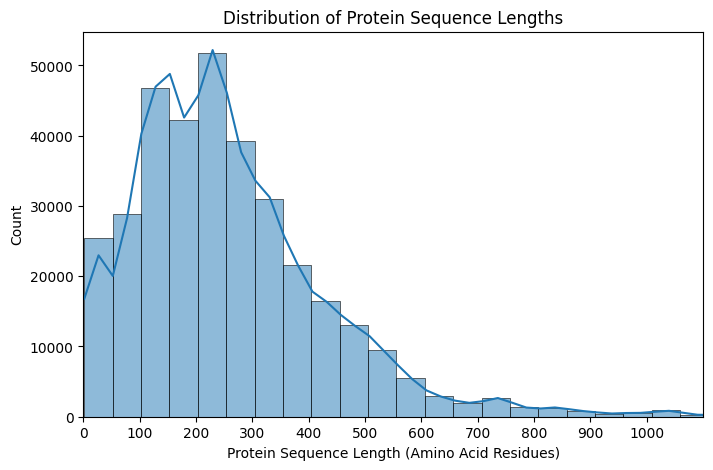

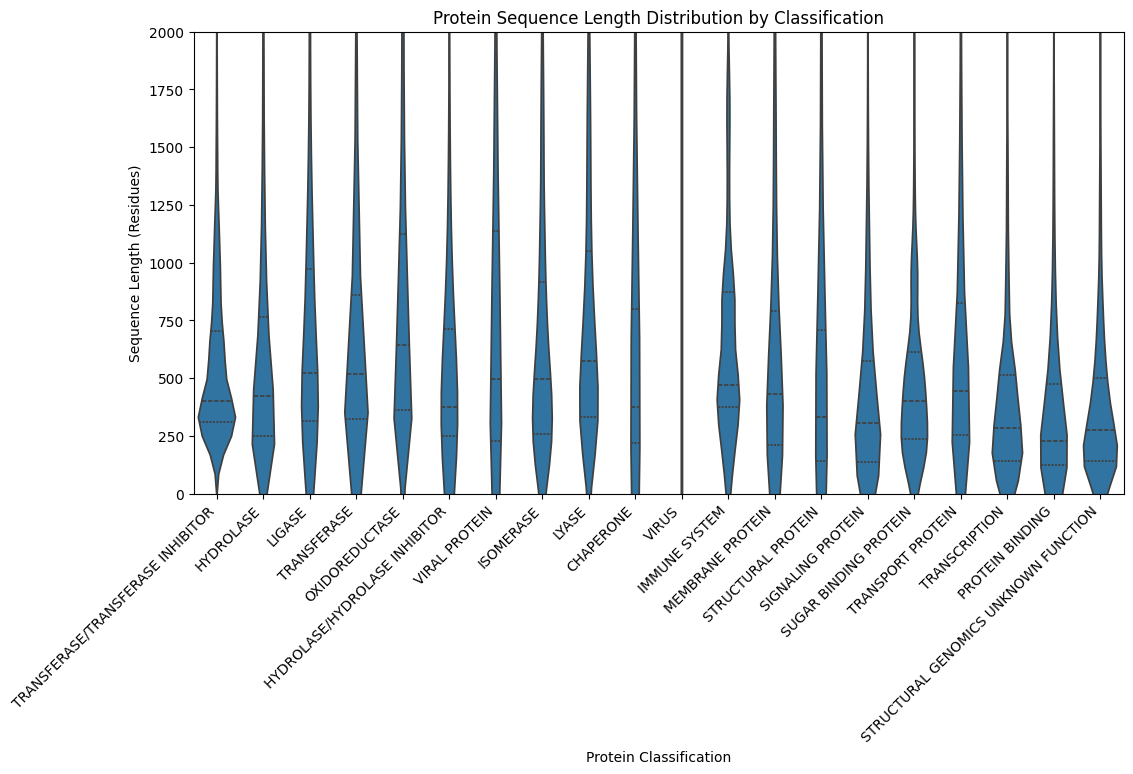

In [19]:
# Add new column
data_filtered['sequence_length'] = data_filtered['combined_sequence'].str.len()

# Histogram of sequence lengths 0-1100 residues
plt.figure(figsize=(8, 5))
sns.histplot(data['sequence_length'], bins=100, kde=True)
plt.title('Distribution of Protein Sequence Lengths')
plt.xlabel('Protein Sequence Length (Amino Acid Residues)')
plt.xticks(ticks=range(0, 1100, 100))
plt.xlim(0, 1100)
plt.ylabel('Count')
plt.show()

# Violin plots of sequences 0-2000 residues, by classification
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='classification', 
    y='sequence_length', 
    data=data_filtered, 
    inner='quartile'  # shows quartiles
)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 2000)
plt.title('Protein Sequence Length Distribution by Classification')
plt.xlabel('Protein Classification')
plt.ylabel('Sequence Length (Residues)')
plt.show()

### 5.2. Classification

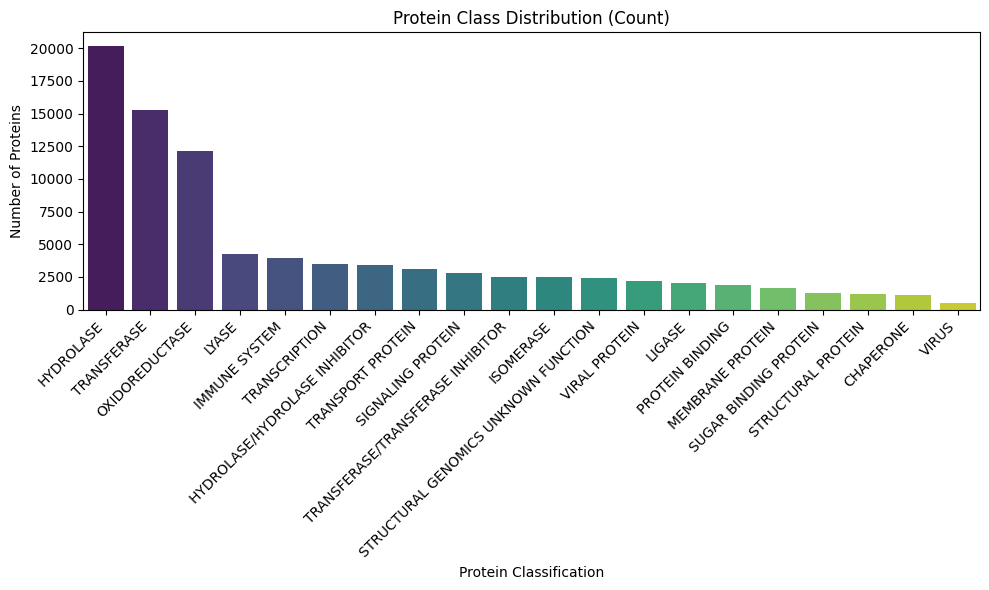

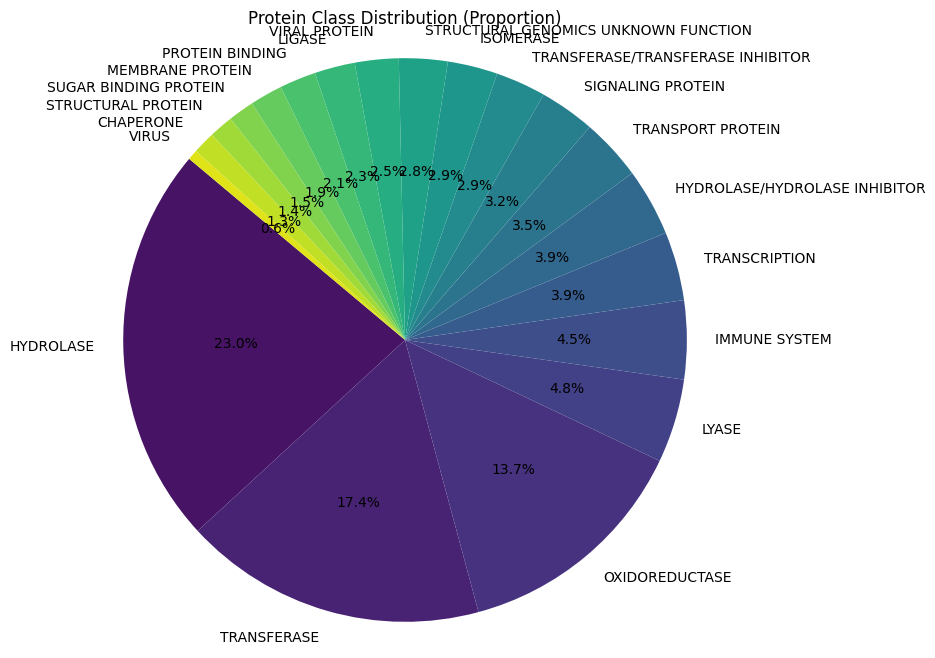

In [20]:
# Count proteins per class
class_counts = data_filtered['classification'].value_counts()

# Bar chart of class distribution
plt.figure(figsize=(10, 6))
sns.barplot(
    x=class_counts.index, 
    y=class_counts.values, 
    palette="viridis"
)
plt.xticks(rotation=45, ha='right')
plt.title('Protein Class Distribution (Count)')
plt.xlabel('Protein Classification')
plt.ylabel('Number of Proteins')
plt.tight_layout()
plt.show()

# Pie chart of class distribution
plt.figure(figsize=(8, 8))
plt.pie(
    class_counts.values, 
    labels=class_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(class_counts))
)
plt.title('Protein Class Distribution (Proportion)')
plt.axis('equal')  # makes pie circular
plt.show()

### 5.3. Amino Acid Composition vs. Class

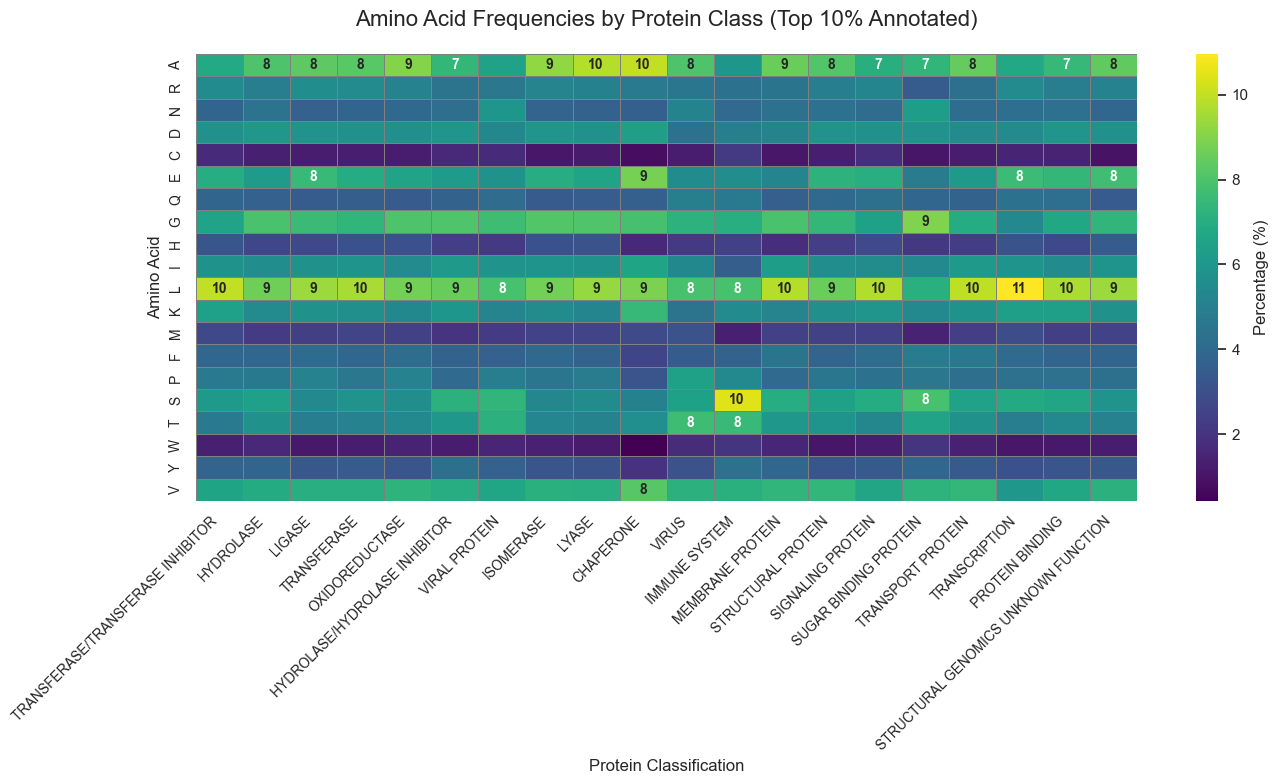

In [28]:
# AA composition heatmap by class

# Amino acid list
aa_list = list("ARNDCEQGHILKMFPSTWYV")

# Count amino acids per class
class_counts = {}
for cls in data_filtered['classification'].unique():
    sequences = data_filtered.loc[data_filtered['classification'] == cls, 'combined_sequence']
    all_seq = ''.join(sequences)
    aa_counts = pd.Series(list(all_seq)).value_counts()
    aa_counts = aa_counts.reindex(aa_list, fill_value=0)
    class_counts[cls] = aa_counts

aa_df = pd.DataFrame(class_counts)

# Convert counts to percentages per class
aa_percent = aa_df.div(aa_df.sum(axis=0), axis=1) * 100

# Annotate only top 10% values
thresholds = aa_percent.quantile(0.9).values[:, None]  # top 10%
annot_df = aa_percent.copy().astype(str)
annot_df = annot_df.where(aa_percent >= thresholds, "")
annot_df = annot_df.applymap(lambda x: f"{float(x):.0f}" if x != "" else "")

# Plot settings
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")  # cleaner background
sns.heatmap(
    aa_percent,
    cmap="viridis",
    annot=annot_df,
    fmt="",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"label": "Percentage (%)"},
    annot_kws={"ha": "center", "va": "center", "size": 10, "weight": "bold"}  # centered annotations
)

# Titles and labels
plt.title("Amino Acid Frequencies by Protein Class (Top 10% Annotated)", fontsize=16, pad=20)
plt.xlabel("Protein Classification", fontsize=12)
plt.ylabel("Amino Acid", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

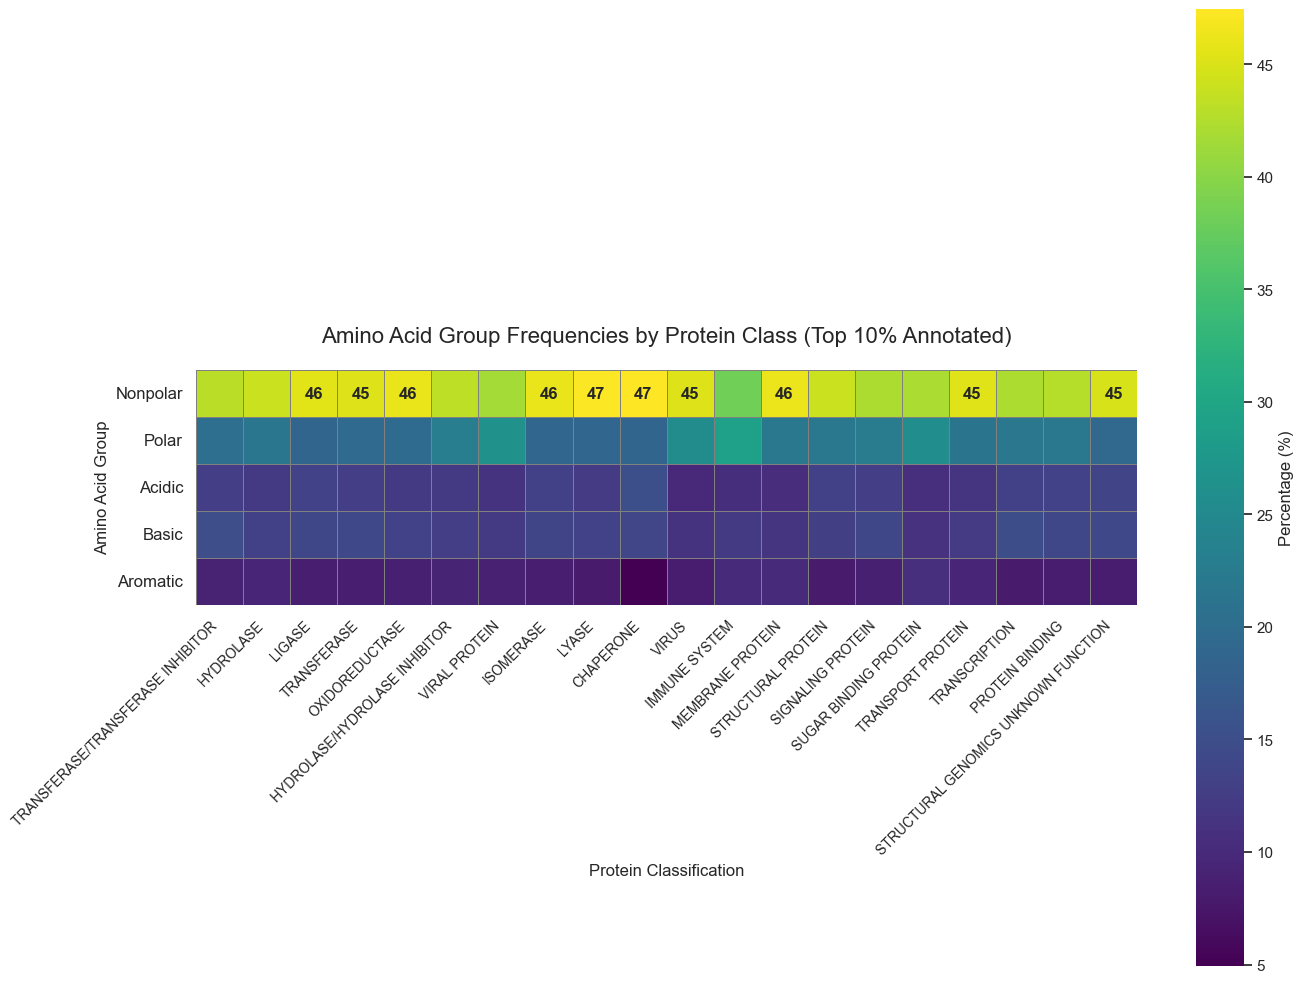

In [27]:
# Define biochemical groups
aa_groups = {
    "Nonpolar": ["A", "V", "L", "I", "M", "P", "G"],
    "Polar": ["S", "T", "C", "N", "Q"],
    "Acidic": ["D", "E"],
    "Basic": ["K", "R", "H"],
    "Aromatic": ["F", "W", "Y"]
}

# Count amino acids per class
aa_list = list("ARNDCEQGHILKMFPSTWYV")
class_counts = {}
for cls in data_filtered['classification'].unique():
    sequences = data_filtered.loc[data_filtered['classification'] == cls, 'combined_sequence']
    all_seq = ''.join(sequences)
    aa_counts = pd.Series(list(all_seq)).value_counts()
    aa_counts = aa_counts.reindex(aa_list, fill_value=0)
    class_counts[cls] = aa_counts

aa_df = pd.DataFrame(class_counts)  # rows: amino acids, columns: classes

# Aggregate by group
group_df = pd.DataFrame(index=aa_groups.keys(), columns=aa_df.columns, dtype=float)
for group_name, aas in aa_groups.items():
    group_df.loc[group_name] = aa_df.loc[aa_df.index.isin(aas)].sum()

# Convert counts to percentages per class
group_percent = group_df.div(group_df.sum(axis=0), axis=1) * 100

# --- Top 10% annotation ---
# Flatten the DataFrame using stack() and get 90th percentile
threshold = group_percent.stack().quantile(0.9)

# Annotate only values >= threshold
annot_df = group_percent.copy().astype(str)
annot_df = annot_df.where(group_percent >= threshold, "")
annot_df = annot_df.applymap(lambda x: f"{float(x):.0f}" if x != "" else "")

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

ax = sns.heatmap(
    group_percent,
    cmap="viridis",
    annot=annot_df,
    fmt="",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"label": "Percentage (%)"},
    annot_kws={"ha": "center", "va": "center", "size": 12, "weight": "bold"}
)

plt.title("Amino Acid Group Frequencies by Protein Class (Top 10% Annotated)", fontsize=16, pad=20)
plt.xlabel("Protein Classification", fontsize=12)
plt.ylabel("Amino Acid Group", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### 5.4. *k*-mer Frequency with Word Clouds

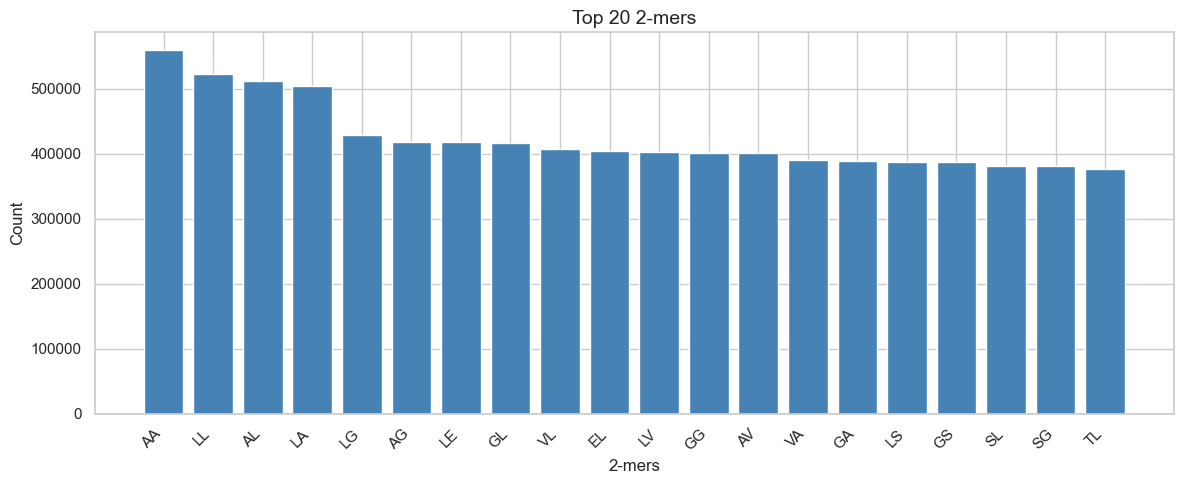

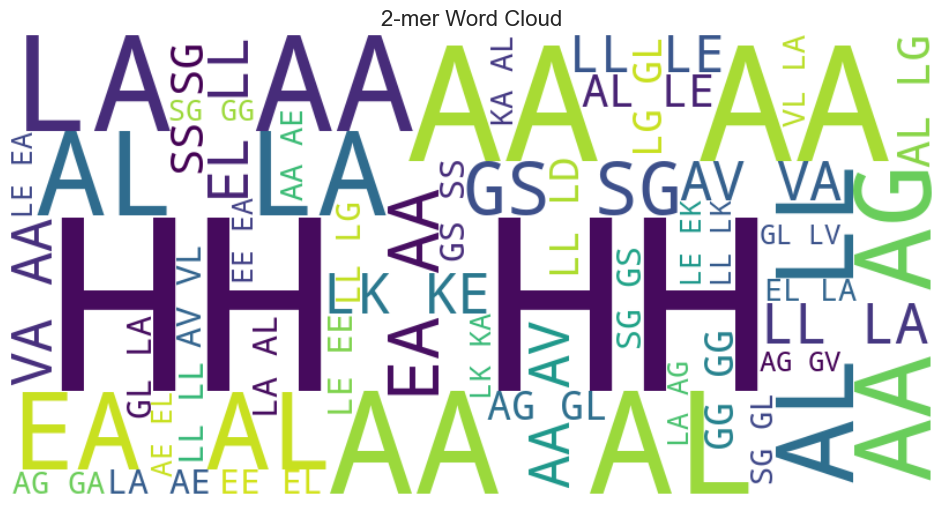

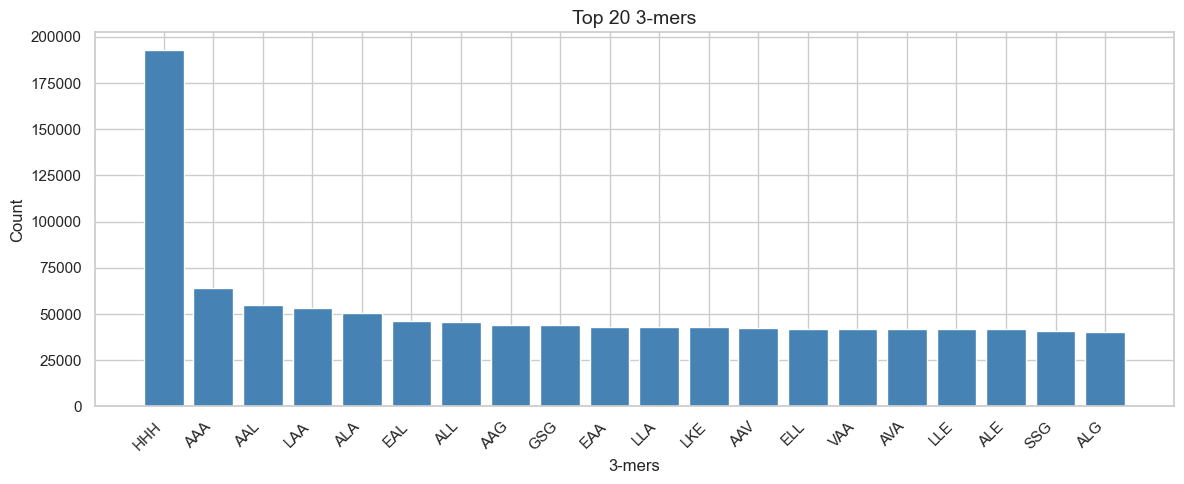

KeyboardInterrupt: 

In [31]:
# Function to generate k-mers
def get_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence)-k+1)]

# Function to count k-mers in dataset
def count_kmers_in_dataset(sequences, k=3, top_n=20):
    all_kmers = []
    for seq in sequences:
        all_kmers.extend(get_kmers(seq, k))
    counter = Counter(all_kmers)
    return counter.most_common(top_n)

# Function to plot top k-mers as bar chart
def plot_top_kmers(sequences, k=3, top_n=20, title=None):
    top_kmers = count_kmers_in_dataset(sequences, k, top_n)
    kmers, counts = zip(*top_kmers)

    plt.figure(figsize=(12,5))
    plt.bar(kmers, counts, color='steelblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    plt.xlabel(f"{k}-mers")
    if title is None:
        title = f"Top {top_n} {k}-mers in Dataset"
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Function to create word cloud of k-mers
def wordcloud_kmers(sequences, k=3, max_words=50, title=None):
    all_kmers = []
    for seq in sequences:
        all_kmers.extend(get_kmers(seq, k))
    text = " ".join(all_kmers)
    
    wc = WordCloud(width=800, height=400, background_color='white', max_words=max_words)
    wc.generate(text)
    
    plt.figure(figsize=(14,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    if title is None:
        title = f"{k}-mer Word Cloud"
    plt.title(title, fontsize=16)
    plt.show()

# --- Apply to dataset ---
sequences = data_filtered['combined_sequence']

# Generate plots for multiple k values
for k in [2, 3, 4]:
    plot_top_kmers(sequences, k=k, top_n=20, title=f"Top 20 {k}-mers")
    wordcloud_kmers(sequences, k=k, max_words=50, title=f"{k}-mer Word Cloud")


### 5.5. Secondary Stucture and Biochemical AA Groups with Logomaker

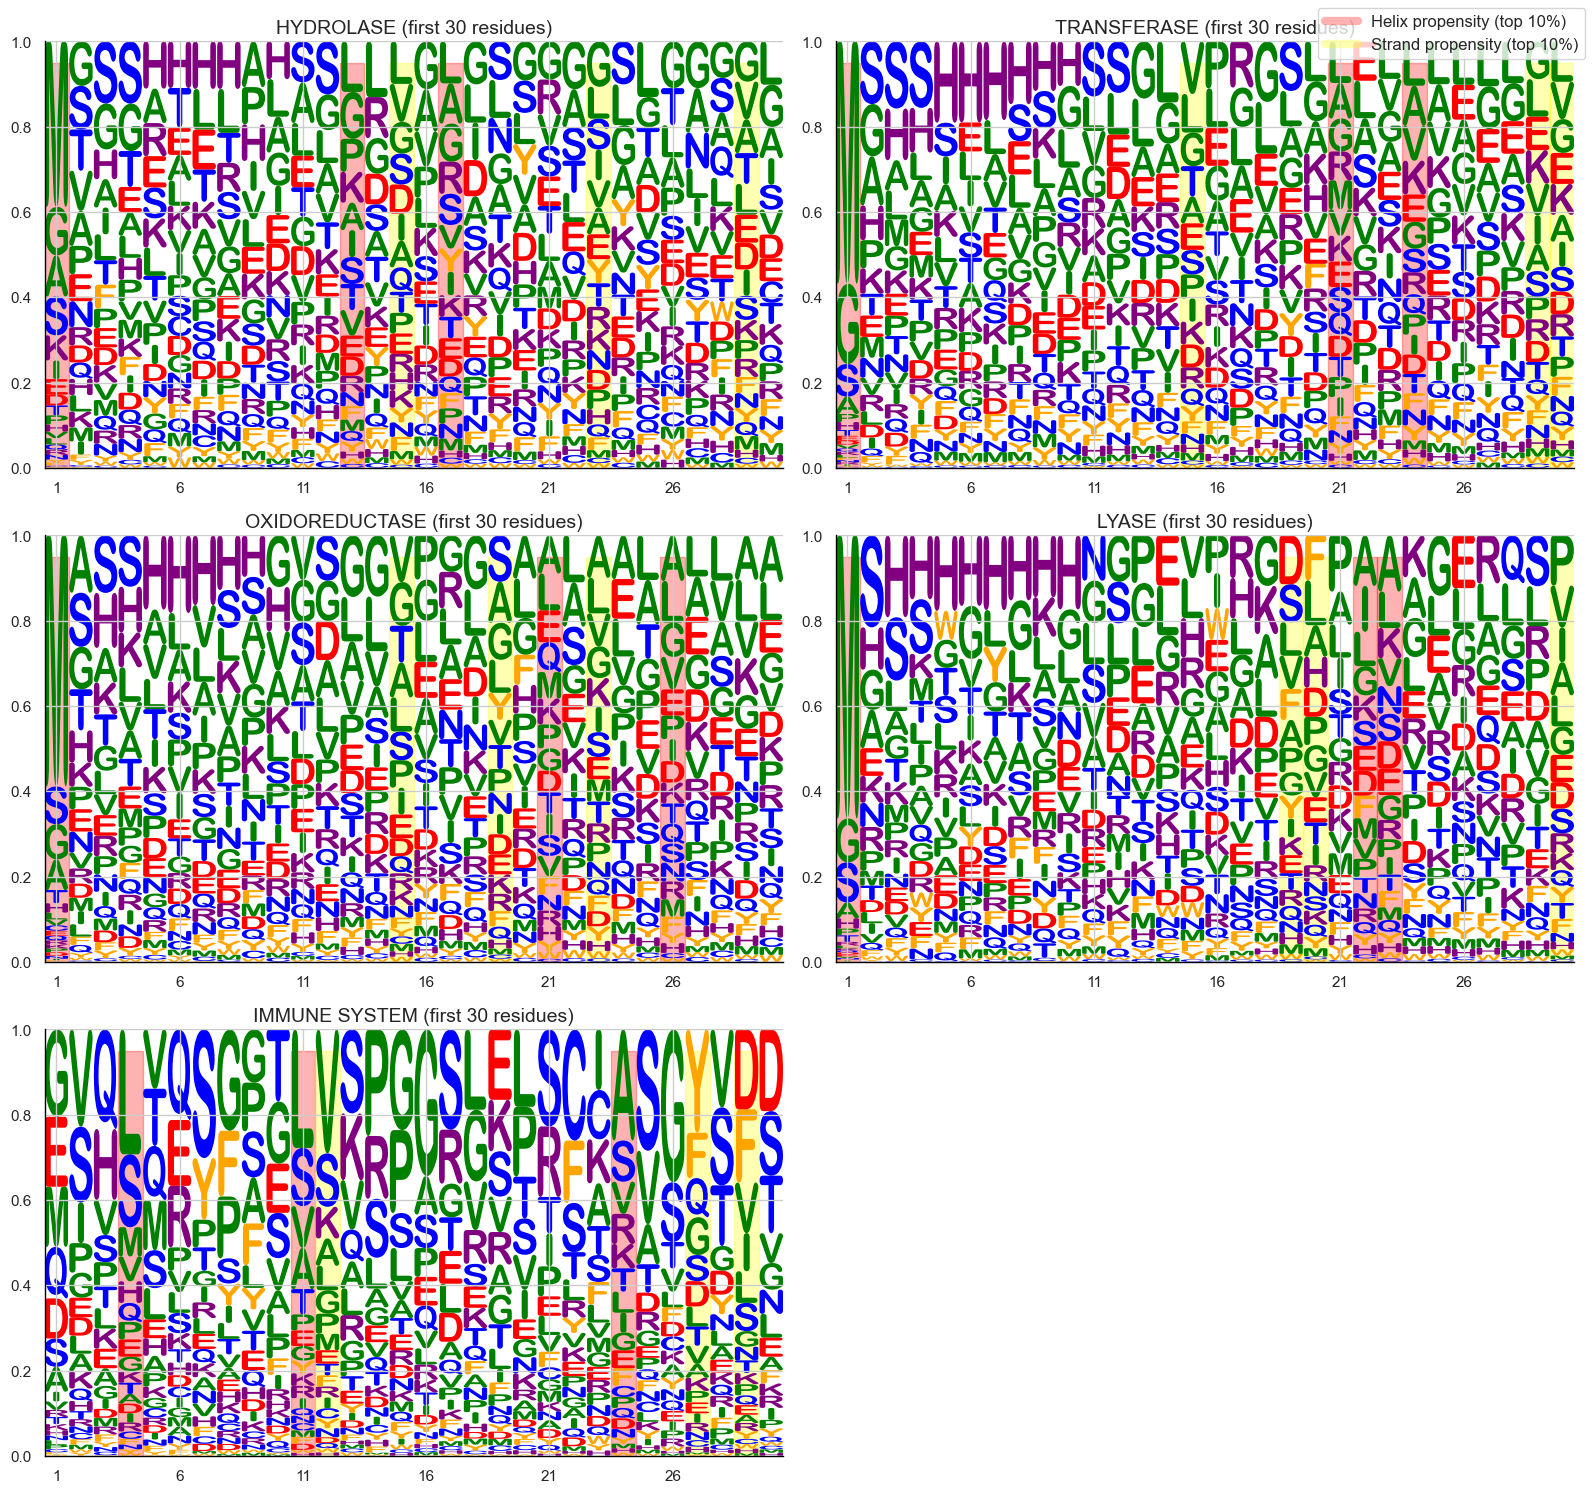

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import logomaker
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np

# -------------------------------
# Parameters
# -------------------------------
max_length = 30
alphabet = "ACDEFGHIKLMNPQRSTVWY"
color_scheme = {
    'A':'green','V':'green','L':'green','I':'green','M':'green','P':'green','G':'green',  # Nonpolar
    'S':'blue','T':'blue','C':'blue','N':'blue','Q':'blue',  # Polar
    'D':'red','E':'red',  # Acidic
    'K':'purple','R':'purple','H':'purple',  # Basic
    'F':'orange','W':'orange','Y':'orange'   # Aromatic
}

helix_aa = set("ALMFKQ")
strand_aa = set("VIFY")

# -------------------------------
# Functions
# -------------------------------
def generate_motif_overlay(sequences):
    """Estimate secondary structure positions based on residue propensity"""
    overlay = []
    for pos in range(max_length):
        column = sequences.str.slice(pos,pos+1)
        h_frac = sum([1 for aa in column if aa in helix_aa]) / len(column)
        e_frac = sum([1 for aa in column if aa in strand_aa]) / len(column)
        overlay.append((h_frac, e_frac))
    return overlay

def sequences_to_pwm(sequences):
    pwm = pd.DataFrame(0, index=list(alphabet), columns=range(len(sequences.iloc[0])))
    for seq in sequences:
        for pos, aa in enumerate(seq):
            if aa in alphabet:
                pwm.at[aa, pos] += 1
    pwm = pwm / pwm.sum(axis=0)
    return pwm

# -------------------------------
# Prepare figure
# -------------------------------
top_classes = data_filtered['classification'].value_counts().index[:5]
n_classes = len(top_classes)
ncols = 2
nrows = (n_classes + 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5*nrows))
axes = axes.flatten()

for i, cls in enumerate(top_classes):
    cls_sequences = data_filtered.loc[data_filtered['classification']==cls,'combined_sequence'].str[:max_length]
    pwm = sequences_to_pwm(cls_sequences)
    overlay = generate_motif_overlay(cls_sequences)

    # Compute percentile thresholds for this class
    h_thresh = np.percentile([h for h,e in overlay], 90)
    e_thresh = np.percentile([e for h,e in overlay], 90)
    
    # Plot logo
    logo = logomaker.Logo(
        pwm.T,
        ax=axes[i],
        shade_below=.5,
        fade_below=.5,
        font_name='Arial Rounded MT Bold',
        color_scheme=color_scheme
    )
    logo.style_spines(visible=False)
    logo.style_spines(spines=['left','bottom'], visible=True)
    
    # X-axis ticks and labels
    axes[i].set_xticks(range(0, max_length, 5))
    axes[i].set_xticklabels(range(1, max_length+1, 5))
    axes[i].set_title(f"{cls} (first {max_length} residues)", fontsize=14)
    
    # Overlay rectangles for top 10% helix/strand positions
    for pos, (h_frac, e_frac) in enumerate(overlay):
        if h_frac >= h_thresh:
            axes[i].add_patch(
                mpatches.Rectangle((pos-0.5, -0.05), 1, 1.0, color='red', alpha=0.3, zorder=-1)
            )
        if e_frac >= e_thresh:
            axes[i].add_patch(
                mpatches.Rectangle((pos-0.5, -0.05), 1, 1.0, color='yellow', alpha=0.3, zorder=-1)
            )

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Figure-level legend
legend_elements = [
    Line2D([0], [0], color='red', lw=6, alpha=0.3, label='Helix propensity (top 10%)'),
    Line2D([0], [0], color='yellow', lw=6, alpha=0.3, label='Strand propensity (top 10%)')
]
fig.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>6. Data Preprocessing II - Preparation for Modeling</strong>
</div>

<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>7. Model Training and Evaluation</strong>
</div>

### 7.1. Overview of Modeling Approaches

- NLP (k-mer) bag-of-words features with top model candidates from LazyClassifer

- LSTM: Sequence-based and tuned neural network model

- LLM: Using embeddings from a protein language model, then feeding to top NLP-fed model plus neural network model

### 7.2. Split Dataset (Training, Validation, Test)

In [35]:
def train_test_split_custom (X, y, size, state):
    """
    Generates training, validation, and test datasets given parameters:
    X: feature(s)
    y: target
    size: size (%) of training set
    state: random state value
    """
    X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=1-size/100,
    stratify=y,
    random_state=state
    )

    X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    stratify=y_temp,
    random_state=42
)

    return X_train, X_val, X_test, y_train, y_val, y_test

size = 70   # Size (%) of training set
state = 42

# Run function
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split_custom(X, y, size, state)

# Check shapes
print("X:")
print(X_train.shape, X_val.shape, X_test.shape)

print()
print("y:")
print(y_train.shape, y_val.shape, y_test.shape)

X:
(61629,) (13206,) (13207,)

y:
(61629,) (13206,) (13207,)


### 7.3. Preprocessing `y`

This processed `y` will be used for all models.

In [36]:
# Use LabelEncoder to encode y
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

print(y_train_enc.shape, y_val_enc.shape, y_test_enc.shape)

(61629,) (13206,) (13207,)


### 7.3. NLP

#### 7.3.1. Preprocessing `X`

The NLP approach with tree/gradient models requires creating *k*-mers for processing sequences (`X`).

In [21]:
# Split sequences into overlapping k-mers (k=3)
def kmer_seq(seq, k=3):
    return [seq[i:i+k] for i in range(len(seq)-k+1)]

# Use list comprehension instead of .apply()
X_train_nlp = [' '.join(kmer_seq(seq, k=3)) for seq in X_train]
X_val_nlp   = [' '.join(kmer_seq(seq, k=3)) for seq in X_val]
X_test_nlp  = [' '.join(kmer_seq(seq, k=3)) for seq in X_test]

# Check first few examples
print(X_train_nlp[:5])

# Initialize vectorizer
vectorizer = CountVectorizer(max_features=5000)  # or TfidfVectorizer() ?

# Fit on training data and transform
X_train_nlp = vectorizer.fit_transform(X_train_nlp)

# Transform validation and test sets
X_val_nlp   = vectorizer.transform(X_val_nlp)
X_test_nlp  = vectorizer.transform(X_test_nlp)

# Check shapes
print(X_train_nlp.shape, X_val_nlp.shape, X_test_nlp.shape)

['MKT KTY TYH YHL HLN LNN NND NDI DII IIV IVT VTQ TQE QEQ EQL QLD LDH DHW HWN WNE NEQ EQL QLI LIK IKL KLE LET ETP TPQ PQE QEI EII IIA IAW AWS WSI SIV IVT VTF TFP FPH PHL HLF LFQ FQT QTT TTA TAF AFG FGL GLT LTG TGL GLV LVT VTI TID IDM DML MLS LSK SKL KLS LSE SEK EKY KYY YYM YMP MPE PEL ELL LLF LFI FID IDT DTL TLH LHH HHF HFP FPQ PQT QTL TLT LTL TLK LKN KNE NEI EIE IEK EKK KKY KYY YYQ YQP QPK PKN KNQ NQT QTI TIH IHV HVY VYK YKP KPD PDG DGC GCE CES ESE SEA EAD ADF DFA FAS ASK SKY KYG YGD GDF DFL FLW LWE WEK EKD KDD DDD DDK DKY KYD YDY DYL YLA LAK AKV KVE VEP EPA PAH AHR HRA RAY AYK YKE KEL ELH LHI HIS ISA SAV AVF VFT FTG TGR GRR RRK RKS KSQ SQG QGS GSA SAR ARS RSQ SQL QLS LSI SII IIE IEI EID IDE DEL ELN LNG NGI GIL ILK LKI KIN INP NPL PLI LIN INW NWT WTF TFE FEQ EQV QVK VKQ KQY QYI YID IDA DAN ANN NNV NVP VPY PYN YNE NEL ELL LLD LDL DLG LGY GYR YRS RSI SIG IGD GDY DYH YHS HST STQ TQP QPV PVK VKE KEG EGE GED EDE DER ERA RAG AGR GRW RWK WKG KGK GKA KAK AKT KTE TEC ECG CGI GIH IHE HEA EAS AS

#### 7.3.2. Address Feature Imbalance

SMOTE will be used to address feature imbalance for the NLP approach only.

In [22]:
def apply_smote(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    return X_train_res, y_train_res

# NLP
print(X_train_nlp.shape)
print(Counter(y_train_enc))
X_train_nlp_res, y_train_enc_res = apply_smote(X_train_nlp, y_train_enc)
print(X_train_nlp_res.shape)
print(Counter(y_train_enc_res))

(157168, 5000)
Counter({np.int64(1): 30255, np.int64(15): 24139, np.int64(8): 22908, np.int64(3): 9656, np.int64(2): 8354, np.int64(6): 7917, np.int64(18): 5645, np.int64(14): 5522, np.int64(17): 5418, np.int64(19): 4694, np.int64(4): 4393, np.int64(10): 4173, np.int64(11): 3725, np.int64(5): 3233, np.int64(9): 3138, np.int64(7): 3131, np.int64(16): 2941, np.int64(12): 2869, np.int64(0): 2743, np.int64(13): 2314})
(605100, 5000)
Counter({np.int64(8): 30255, np.int64(1): 30255, np.int64(14): 30255, np.int64(3): 30255, np.int64(6): 30255, np.int64(15): 30255, np.int64(10): 30255, np.int64(7): 30255, np.int64(17): 30255, np.int64(18): 30255, np.int64(13): 30255, np.int64(2): 30255, np.int64(16): 30255, np.int64(0): 30255, np.int64(4): 30255, np.int64(5): 30255, np.int64(12): 30255, np.int64(11): 30255, np.int64(9): 30255, np.int64(19): 30255})


#### 7.3.3. Baseline Models with LazyClassifier

LazyClassifier will be used to see which models perform the best at baseline with no tuning.

In [26]:
# Dimensionality reduction directly on sparse data (no toarray)
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_svd = svd.fit_transform(X_train_nlp_res)
X_test_svd  = svd.transform(X_test_nlp)

print(X_train_svd.shape)
print(X_test_svd.shape)

""" (Already run and results saved)
# Run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_svd, X_test_svd, y_train_enc_res, y_test_enc)

print(models)
"""

' (Already run and results saved)\n# Run LazyClassifier\nclf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)\nmodels, predictions = clf.fit(X_train_svd, X_test_svd, y_train_enc_res, y_test_enc)\n\nprint(models)\n'

#### 7.3.4. RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier 

These were the top 3 models from LazyClassifer and will be investigated and tuned further.

In [27]:
# RandomForestClassifier
def objective_randomforest(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_svd, y_train_enc_res, cv=cv, scoring='accuracy').mean()
    return score

# ExtraTreesClassifier
def objective_extratrees(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_svd, y_train_enc_res, cv=cv, scoring='accuracy').mean()
    return score

# BaggingClassifier
def objective_bagging(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_samples = trial.suggest_float('max_samples', 0.3, 0.7)
    max_features = trial.suggest_float('max_features', 0.3, 0.7)
    
    model = BaggingClassifier(
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_svd, y_train_enc_res, cv=cv, scoring='accuracy').mean()
    return score

# Run Optimizations
print("\nOptimizing RandomForestClassifier...")
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_randomforest, n_trials=25, show_progress_bar=True)

print("Optimizing ExtraTreesClassifier...")
study_et = optuna.create_study(direction="maximize")
study_et.optimize(objective_extratrees, n_trials=25, show_progress_bar=True)

print("\nOptimizing BaggingClassifier...")
study_bg = optuna.create_study(direction="maximize")
study_bg.optimize(objective_bagging, n_trials=25, show_progress_bar=True)

# Compare Results
print("\nBest RandomForest params:", study_rf.best_params)
print("Best RandomForest accuracy:", study_rf.best_value)

print("\nBest ExtraTrees params:", study_et.best_params)
print("Best ExtraTrees accuracy:", study_et.best_value)

print("\nBest Bagging params:", study_bg.best_params)
print("Best Bagging accuracy:", study_bg.best_value)

[I 2025-11-13 13:11:48,990] A new study created in memory with name: no-name-52f3ce3d-aac2-4049-9b74-f593d64267ad



Optimizing RandomForestClassifier...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-13 13:14:54,151] Trial 0 finished with value: 0.5282283920013221 and parameters: {'n_estimators': 176, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5282283920013221.
[I 2025-11-13 14:20:30,498] Trial 1 finished with value: 0.9049099322426045 and parameters: {'n_estimators': 341, 'max_depth': 45, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 0.9049099322426045.
[I 2025-11-13 14:26:23,836] Trial 2 finished with value: 0.7850537101305569 and parameters: {'n_estimators': 264, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9049099322426045.
[I 2025-11-13 14:36:17,818] Trial 3 finished with value: 0.7422078995207403 and parameters: {'n_estimators': 468, 'max_depth': 21, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.904909932242604

[I 2025-11-13 17:23:51,721] A new study created in memory with name: no-name-92fd98a0-d41f-4e07-8b83-3f788e80d611


[I 2025-11-13 17:23:51,716] Trial 24 finished with value: 0.9169889274500083 and parameters: {'n_estimators': 101, 'max_depth': 44, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 11 with value: 0.9195240456122956.
Optimizing ExtraTreesClassifier...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-13 17:27:17,975] Trial 0 finished with value: 0.5621649314162949 and parameters: {'n_estimators': 363, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.5621649314162949.
[I 2025-11-13 17:33:10,867] Trial 1 finished with value: 0.8702776400594944 and parameters: {'n_estimators': 446, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8702776400594944.
[I 2025-11-13 17:36:18,411] Trial 2 finished with value: 0.9099471161791439 and parameters: {'n_estimators': 224, 'max_depth': 49, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9099471161791439.
[I 2025-11-13 17:42:33,761] Trial 3 finished with value: 0.8850834572797884 and parameters: {'n_estimators': 466, 'max_depth': 33, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with value: 0.9099471161791439.
[I 2025-11-13 17:48:47,337] Trial 4 finished with value: 0.8982102131879027 and parameters: 

[I 2025-11-13 18:48:30,702] A new study created in memory with name: no-name-0b96b548-0424-447d-bfae-b850ca7ddf41


[I 2025-11-13 18:48:30,699] Trial 24 finished with value: 0.9180862667327715 and parameters: {'n_estimators': 194, 'max_depth': 44, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 11 with value: 0.9189968600231367.

Optimizing BaggingClassifier...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-13 18:52:42,524] Trial 0 finished with value: 0.9148702693769625 and parameters: {'n_estimators': 50, 'max_samples': 0.5723967979737536, 'max_features': 0.5077513560736228}. Best is trial 0 with value: 0.9148702693769625.
[I 2025-11-13 18:56:17,370] Trial 1 finished with value: 0.9145926293174682 and parameters: {'n_estimators': 55, 'max_samples': 0.5009674342298256, 'max_features': 0.49729167432035426}. Best is trial 0 with value: 0.9148702693769625.
[I 2025-11-13 18:58:57,812] Trial 2 finished with value: 0.9136159312510329 and parameters: {'n_estimators': 39, 'max_samples': 0.5861691508855266, 'max_features': 0.44611086671841393}. Best is trial 0 with value: 0.9148702693769625.
[I 2025-11-13 19:07:47,646] Trial 3 finished with value: 0.9164633944802513 and parameters: {'n_estimators': 94, 'max_samples': 0.5321958056023621, 'max_features': 0.6896692282849197}. Best is trial 3 with value: 0.9164633944802513.
[I 2025-11-13 19:11:54,964] Trial 4 finished with value: 0.9153197

#### 7.3.5. Model Evaluation

In [33]:
# Dictionary of best models from each study
best_models = {
    "RandomForest": RandomForestClassifier(**study_rf.best_params, random_state=42, n_jobs=-1),
    "ExtraTreesClassifier": ExtraTreesClassifier(**study_et.best_params, random_state=42, n_jobs=-1),
    "BaggingClassifier": BaggingClassifier(**study_bg.best_params, random_state=42, n_jobs=-1)
}

# Train and evaluate each optimized model
for name, model in best_models.items():
    print(f"\n===== {name} (Best Optuna Params) =====")
    model.fit(X_train_svd, y_train_enc_res)
    preds = model.predict(X_test_svd)
    
    acc = accuracy_score(y_test_enc, preds)
    print(f"Accuracy: {acc:.3f}\n")
    print("Classification Report:")
    print(classification_report(y_test_enc, preds))

# Save each optimized model with Pickle
# Create folder for saved models
os.makedirs("saved_models", exist_ok=True)

# Save each model
for name, model in best_models.items():
    filename = f"saved_models/{name}_optuna.pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"Saved: {filename}")


===== RandomForest (Best Optuna Params) =====
Accuracy: 0.896

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       588
           1       0.86      0.87      0.87      6483
           2       0.75      0.90      0.82      1790
           3       0.95      0.95      0.95      2069
           4       0.98      0.92      0.95       941
           5       0.93      0.87      0.90       693
           6       0.98      0.95      0.96      1697
           7       0.89      0.85      0.87       671
           8       0.97      0.96      0.97      4909
           9       0.82      0.69      0.75       673
          10       0.82      0.82      0.82       894
          11       0.78      0.75      0.76       798
          12       0.93      0.85      0.89       614
          13       0.97      0.95      0.96       496
          14       0.84      0.86      0.85      1184
          15       0.89      0.89      0.89     

### 7.4. LSTM

#### 7.4.1. Preprocessing `X`

The neural network approach with LSTM requires a Tokenizer for processing sequences (`X`).

In [64]:
"""
# Create k-mer function
def create_kmers(seq, k=3):
    seq = seq.upper().strip()
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

# Run k-mer function
k = 3
X_train_kmers = [create_kmers(seq, k) for seq in X_train]
X_val_kmers   = [create_kmers(seq, k) for seq in X_val]
X_test_kmers  = [create_kmers(seq, k) for seq in X_test]
"""

# Character level/k-mer-level tokenization (1 or 3 AA's per token)
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train)

# Tokenize each X dataset - still enforcing max length of 1024 even though it was included earlier
max_len = 1024

X_train_lstm = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len, padding='post')
X_val_lstm   = pad_sequences(tokenizer.texts_to_sequences(X_val), maxlen=max_len, padding='post')
X_test_lstm  = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len, padding='post')

# Check
print(X_train_lstm.shape, X_val_lstm.shape, X_test_lstm.shape)

(61629, 1024) (13206, 1024) (13207, 1024)


#### 7.4.2. Create Neural Network

In [65]:
# SETUP
# Class imbalance
classes = np.unique(y_train_enc)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes,
                                     y=y_train_enc)
# Make a dict for Keras
class_weight_dict = dict(zip(classes, class_weights))

# Define remaining embedding variables
vocab_size = len(tokenizer.word_index) + 1  # plus 1 for padding token

# Check input variables
try:
    print("X_train_lstm shape:", X_train_lstm.shape)
    print("y_train_enc shape:", y_train_enc.shape)
    print("X_val_lstm shape:", X_val_lstm.shape)
    print("y_val_enc shape:", y_val_enc.shape)
    print("X_test_lstm shape:", X_test_lstm.shape)
    print("y_test_enc shape:", y_test_enc.shape)
    print("max_len:", max_len)
    print("vocab_size:", vocab_size)
    print("Number of classes:", len(le.classes_))
except NameError as e:
    print(f"❌ Missing variable: {e}")
except Exception as e:
    print(f"❌ Error: {e}")

# MODEL ARCHITECTURE
inputs = Input(shape=(max_len,))

# Embedding
x = Embedding(input_dim=vocab_size, output_dim=128, mask_zero=True)(inputs)

# BiLSTM
x = Bidirectional(LSTM(256, dropout=0.3, return_sequences=False))(x)

# Dense
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Output
outputs = Dense(len(le.classes_), activation='softmax')(x)

# Build & compile
model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=3e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# CALLBACKS
# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',       # what to watch
    patience=2,               # wait 2 epochs
    restore_best_weights=True # revert to best model
)

# Reduce learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,       # reduce LR
    patience=2,       # wait 2 epochs
    min_lr=1e-6
)

# Save best epoch to file
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    save_weights_only=False,
    verbose=1
)

model.summary()

X_train_lstm shape: (61629, 1024)
y_train_enc shape: (61629,)
X_val_lstm shape: (13206, 1024)
y_val_enc shape: (13206,)
X_test_lstm shape: (13207, 1024)
y_test_enc shape: (13207,)
max_len: 1024
vocab_size: 21
Number of classes: 20


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 1024, 128) │      2,688 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_6         │ (None, 1024)      │          0 │ input_layer_6[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 512)       │    788,480 │ embedding_6[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 128)       │     65,664 │ bidirectional_6[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 20)        │      2,580 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 859,412 (3.28 MB)

 Trainable params: 859,412 (3.28 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
import numpy as np
print(data_filtered['combined_sequence'].head())
lengths = [len(seq) for seq in data_filtered['combined_sequence']]
print("Number of sequences:", len(lengths))
print("Median:", np.median(lengths))
print("95th percentile:", np.percentile(lengths, 95))
print("Max:", max(lengths))

0    PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...
2    TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
4    MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
6    KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
8    KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
Name: combined_sequence, dtype: object
Number of sequences: 88042
Median: 457.0
95th percentile: 2124.0
Max: 313236


#### 7.4.3. Train Model

In [ ]:
history_lstm = model.fit(
    X_train_lstm, y_train_enc,
    validation_data=(X_val_lstm, y_val_enc),
    batch_size=256,
    epochs=50,                     # Max epochs
    class_weight=class_weight_dict, # Class imbalance dict
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1 
)

test_loss, test_acc = model.evaluate(X_test_lstm, y_test_enc)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 53s/step - accuracy: 0.0438 - loss: 2.9973 
Epoch 1: val_accuracy improved from None to 0.10268, saving model to best_model.keras
241/241 ━━━━━━━━━━━━━━━━━━━━ 13324s 55s/step - accuracy: 0.0626 - loss: 2.9223 - val_accuracy: 0.1027 - val_loss: 2.8209 - learning_rate: 3.0000e-04
Epoch 2/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 51s/step - accuracy: 0.0989 - loss: 2.7724 
Epoch 2: val_accuracy improved from 0.10268 to 0.12101, saving model to best_model.keras
241/241 ━━━━━━━━━━━━━━━━━━━━ 12795s 53s/step - accuracy: 0.1110 - loss: 2.7317 - val_accuracy: 0.1210 - val_loss: 2.7301 - learning_rate: 3.0000e-04
Epoch 3/50
241/241 ━━━━━━━━━━━━━━━━━━━━ 0s 50s/step - accuracy: 0.1222 - loss: 2.6577 
Epoch 3: val_accuracy improved from 0.12101 to 0.13562, saving model to best_model.keras
241/241 ━━━━━━━━━━━━━━━━━━━━ 12657s 53s/step - accuracy: 0.1249 - loss: 2.6644 - val_accuracy: 0.1356 - val_loss: 2.7170 - learning_rate: 3.0000e-04
Epoch 4/50
241/241 ━━━━━━━━━

#### 7.4.4. Plot Training History

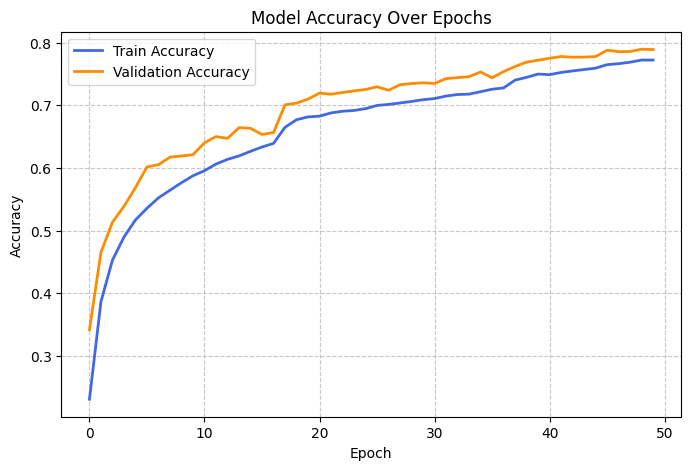

In [ ]:
# history is returned from model.fit()
history_lstm.history.keys()

# Plot
plt.figure(figsize=(8,5))
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy', color='royalblue', linewidth=2)
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy', color='darkorange', linewidth=2)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot function

### 7.5. LLM

#### 7.5.1. Preprocess `X`

Sequences need to be converted to embeddings from a pre-trained language model. We will use ESM-2 as it is the most suited to protein sequences.

In [ ]:
# Subset to test
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Choose a tiny subset so it definitely runs
tiny_sequences = data_filtered['combined_sequence'][:100]  # limited # of sequences

def save_esm_embeddings(sequences, out_file, batch_size=1):
    with h5py.File(out_file, 'w') as f:
        for i in range(0, len(sequences), batch_size):
            batch_seqs = sequences[i:i+batch_size]

            # Format for the batch converter
            batch_data = [(str(j), seq) for j, seq in enumerate(batch_seqs)]
            _, _, tokens = batch_converter(batch_data)

            tokens = tokens.to(device)

            with torch.no_grad():
                results = model(tokens, repr_layers=[6])
                # Change repr layer index to match your model (t6 → layer 6)
                reps = results["representations"][6].cpu().numpy()

            # Save each embedding individually
            for k, seq in enumerate(batch_seqs):
                f.create_dataset(f"seq_{i+k}", data=reps[k])

    print(f"Saved {len(sequences)} embeddings to {out_file}")

# Run test
save_esm_embeddings(tiny_sequences, "esm_test_embeddings.h5", batch_size=1)


Saved 100 embeddings to esm_test_embeddings.h5


In [38]:
# Inspect embeddings file
with h5py.File("esm_test_embeddings.h5", "r") as f:
    print("Datasets:", list(f.keys()))
    for key in f.keys():
        print(key, f[key].shape)   

Datasets: ['seq_0', 'seq_1', 'seq_10', 'seq_11', 'seq_12', 'seq_13', 'seq_14', 'seq_15', 'seq_16', 'seq_17', 'seq_18', 'seq_19', 'seq_2', 'seq_20', 'seq_21', 'seq_22', 'seq_23', 'seq_24', 'seq_25', 'seq_26', 'seq_27', 'seq_28', 'seq_29', 'seq_3', 'seq_30', 'seq_31', 'seq_32', 'seq_33', 'seq_34', 'seq_35', 'seq_36', 'seq_37', 'seq_38', 'seq_39', 'seq_4', 'seq_40', 'seq_41', 'seq_42', 'seq_43', 'seq_44', 'seq_45', 'seq_46', 'seq_47', 'seq_48', 'seq_49', 'seq_5', 'seq_50', 'seq_51', 'seq_52', 'seq_53', 'seq_54', 'seq_55', 'seq_56', 'seq_57', 'seq_58', 'seq_59', 'seq_6', 'seq_60', 'seq_61', 'seq_62', 'seq_63', 'seq_64', 'seq_65', 'seq_66', 'seq_67', 'seq_68', 'seq_69', 'seq_7', 'seq_70', 'seq_71', 'seq_72', 'seq_73', 'seq_74', 'seq_75', 'seq_76', 'seq_77', 'seq_78', 'seq_79', 'seq_8', 'seq_80', 'seq_81', 'seq_82', 'seq_83', 'seq_84', 'seq_85', 'seq_86', 'seq_87', 'seq_88', 'seq_89', 'seq_9', 'seq_90', 'seq_91', 'seq_92', 'seq_93', 'seq_94', 'seq_95', 'seq_96', 'seq_97', 'seq_98', 'seq_99']

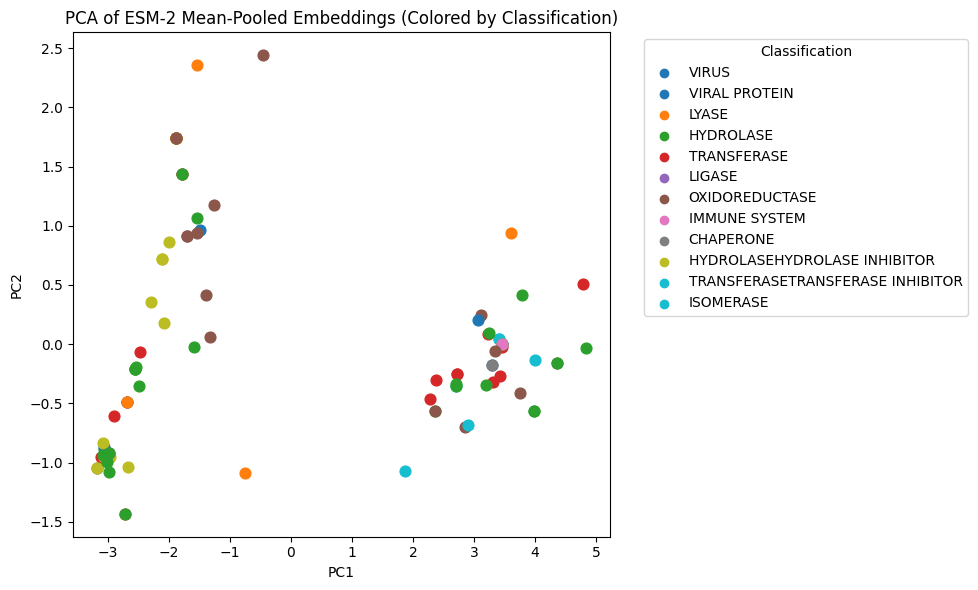

In [46]:
# ---------------------------
# 1. Load mean-pooled embeddings
# ---------------------------
def load_mean_pooled_embeddings(h5_file):
    """
    Load embeddings from h5 file and mean-pool over sequence length.
    Returns a dict: {seq_key: embedding_vector}
    """
    pooled = {}
    with h5py.File(h5_file, "r") as f:
        for key in f.keys():
            emb = f[key][:]
            pooled[key] = emb.mean(axis=0)  # mean pooling
    return pooled

pooled = load_mean_pooled_embeddings("esm_test_embeddings.h5")

# ---------------------------
# 2. Prepare embedding matrix and labels
# ---------------------------
labels = list(pooled.keys())                 # ['seq_0', 'seq_1', ...]
X = np.vstack([pooled[k] for k in labels])  # shape: (n_sequences, embedding_dim)

# ---------------------------
# 3. Map classification
# ---------------------------
# Assumes the order of pooled.keys() matches data_filtered rows
class_list = data_filtered['classification'].tolist()[:len(labels)]

# ---------------------------
# 4. PCA
# ---------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ---------------------------
# 5. Map classes to colors
# ---------------------------
unique_classes = list(set(class_list))
colors_map = plt.cm.tab10(np.linspace(0, 1, len(unique_classes)))
class_to_color = {cls: c for cls, c in zip(unique_classes, colors_map)}

# ---------------------------
# 6. Plot PCA
# ---------------------------
plt.figure(figsize=(10,6))
for i, label in enumerate(labels):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=class_to_color[class_list[i]], s=60)

# Add legend
for cls, color in class_to_color.items():
    plt.scatter([], [], color=color, label=cls)
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of ESM-2 Mean-Pooled Embeddings (Colored by Classification)")
plt.tight_layout()
plt.show()


In [ ]:
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

def save_esm_embeddings(sequences, out_file, batch_size=1):
    with h5py.File(out_file, 'w') as f:
        # Get embedding dim
        batch_data = [(str(0), sequences[0])]
        _, _, batch_tokens = batch_converter(batch_data)
        with torch.no_grad():
            token_embeddings = model(batch_tokens, repr_layers=[5], return_contacts=False)["representations"][5]
        embedding_dim = token_embeddings.size(-1)
        dset = f.create_dataset('embeddings', (len(sequences), embedding_dim), dtype='float16')

        idx = 0
        for i in tqdm(range(0, len(sequences), batch_size)):
            batch_seqs = sequences[i:i+batch_size]
            batch_data = [(str(j), seq) for j, seq in enumerate(batch_seqs)]
            _, _, batch_tokens = batch_converter(batch_data)
            batch_tokens = batch_tokens.to(device)

            with torch.no_grad():
                token_embeddings = model(batch_tokens, repr_layers=[5], return_contacts=False)["representations"][5]
                token_embeddings = token_embeddings.half()  # reduce memory

                for j, (_, seq) in enumerate(batch_data):
                    seq_len = len(seq)
                    if seq_len == 0:
                        continue
                    emb = token_embeddings[j, 1:seq_len+1].mean(0)
                    dset[idx] = emb.cpu().numpy()
                    idx += 1

            del batch_tokens, token_embeddings
            torch.cuda.empty_cache()

# Example usage:
save_esm_embeddings(X_train, "X_train_emb.h5")
save_esm_embeddings(X_val, "X_val_emb.h5")
save_esm_embeddings(X_test, "X_test_emb.h5")


  0%|          | 0/161295 [00:00<?, ?it/s]

#### 7.5.2. Tree Model

We will first train our best model from the NLP section using the embeddings from ESM-2.

In [ ]:
# Tree approach
# Train best classifiers from previous section
clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, random_state=42)
clf.fit(X_train_emb, y_train_enc)

# Evaluate
y_val_pred  = clf.predict(X_val_emb)
y_test_pred = clf.predict(X_test_emb)

print("Validation Accuracy:", accuracy_score(y_val_enc, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test_enc, y_test_pred))

#### 7.5.3. Neural Network

Next, we will train a neural network (similar to LSTM but simplified) with the ESM-2 embeddings.

In [ ]:
# Neural network approach
input_dim = X_train_emb.shape[1]  # embedding size

# Model architecture
model_llm = Sequential([
    Dense(512, activation='relu', input_shape=(input_dim,)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

# Build model
model_llm.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Run model
history_llm = model_llm.fit(
    X_train_llm, y_train_llm,
    validation_data=(X_val_llm, y_val_llm),
    batch_size=256,
    epochs=20,
    class_weight=class_weight_dict,  # if classes are imbalanced
)

### 7.6. Model Comparison

<div style="width: 100%; background-color: #1565C0; text-align: left; font-size: 30px; padding: 10px; border-radius: 5px;">
  <strong>8. Conclusion</strong>
</div>

- NLP 90 maybe 93-95
- LSTM 78
- LLM need full embeddings

(Paper)
# Machine Learning-Based Classification of Structural Protein Sequences for Drug Discovery

1. Overview
    - How ML can improve drug discovery
    - In this paper we will compare 3 different ML methods that could be used in drug discovery and protein targetting
        - NLP
        - LSTM
        - LLM
2. Data Source/Explanation/Definitions
    - How many protein types, max, min, EDA
    - Biochemical (AA) plots, etc.
3. Application of Methods: NLP (Tree Models)
    - Methods
    - Results
    - Limitations/Improvements
4. Application of Methods: LSTM (Keras/TensorFlow)
5. Application of Methods: LLM (ESM-2)
6. Conclusion/Discussion
    - Difficulties (computation power)
    - Recommendations